In [14]:
#### Importing necessary libraries

# For scientific computation and processing array elements.
import numpy as np
from scipy.stats import norm

# Importing pandas
import pandas as pd

# For plotting statstical visualization
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

# Updating nltk library
import nltk
nltk.download('stopwords')
nltk.download('punkt')


# Importing stopwords from nltk library
from nltk.corpus import stopwords

# Import punctuations
import string

# Import regex library
import re

# Import BeautifulSoup library
from bs4 import BeautifulSoup

# For stemming to corpus
from nltk.stem.porter import PorterStemmer

# For corpus lemmatization
from nltk.stem import WordNetLemmatizer

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# For pretty-printing tabular data
from tabulate import tabulate

# KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer

# Importing clustering Evaluation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Importing algorithams for building model
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import LatentDirichletAllocation

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vishal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vishal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
# Loading Dataset
df=pd.read_csv(r"D:\NetFlix_Clustering\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [16]:
# First Five Observations
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [57]:
# Last five observations
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [17]:
# Data Inispection
# Checking shape of the dataset
df.shape
print(f'Dataset having {df.shape[0]} rows and {df.shape[1]} columns')

Dataset having 7787 rows and 12 columns


In [18]:
# Checking columns name of dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [20]:
# Basic description of Dataset of all numerical variables
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

In [21]:
# Basic description of Dataset of all categorical variables
df.describe(include='object')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   

              country       date_added rating  duration      listed_in  \
count            7280             7777   7780      7787           7787   
unique            681             1565     14       216            492   
top     United States  January 1, 2020  TV-MA  1 Season  Documentaries   
freq             2555              118   2863      1608            334   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3

In [22]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [23]:
# Checking for number of null values in dataset
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum()})
count_null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)

number_of_nulls_values
columns                             
director                        2389
cast                             718
country                          507
date_added                        10
rating                             7
title                              0
show_id                            0
type                               0
release_year                       0
duration                           0
listed_in                          0
description                        0

In [25]:
# Understanding Variables
# Variables/Columns of dataset
columns=list(df.columns)
print(columns)

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [26]:
# Basic description of all Dataset
df.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

In [27]:
# Finding Categorical variables
categorical_variables=[var for var in df.describe(include='object')]
print(f'Dataset having {len(categorical_variables)} categorical variables')
print('~~'*45)
print(categorical_variables)

Dataset having 11 categorical variables
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


In [28]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print(f'Dataset having {len(numerical_variables)} numerical variables')
print('~~'*45)
print(numerical_variables)

Dataset having 1 numerical variables
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['release_year']


In [29]:
# Unique Values and its frequency for each variable
for var in df.columns:
    print(f'Feature Name : {var}\n')
    category=df[var].value_counts()
    print(category)
    print('~~'*45)

Feature Name : show_id

show_id
s1       1
s2       1
s3       1
s4       1
s5       1
        ..
s7783    1
s7784    1
s7785    1
s7786    1
s7787    1
Name: count, Length: 7787, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature Name : type

type
Movie      5377
TV Show    2410
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature Name : title

title
3%                                         1
7:19                                       1
23:59                                      1
9                                          1
21                                         1
                                          ..
Zozo                                       1
Zubaan                                     1
Zulu Man in Japan                          1
Zumbo's Just Desserts                      1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    1
Name: count, Lengt

In [30]:
# Data Wrangling and Feature Engineering
# [1] Handling Duplicate Values

# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [31]:
# [2] Handling Null / Missing Values
# Checking for number of null values
null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum(),'percentage_null_values':round(df.isna().sum()*100/len(df),2)})
null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

number_of_nulls_values  percentage_null_values
columns                                                     
director                        2389                   30.68
cast                             718                    9.22
country                          507                    6.51
date_added                        10                    0.13
rating                             7                    0.09
title                              0                    0.00
show_id                            0                    0.00
type                               0                    0.00
release_year                       0                    0.00
duration                           0                    0.00
listed_in                          0                    0.00
description                        0                    0.00

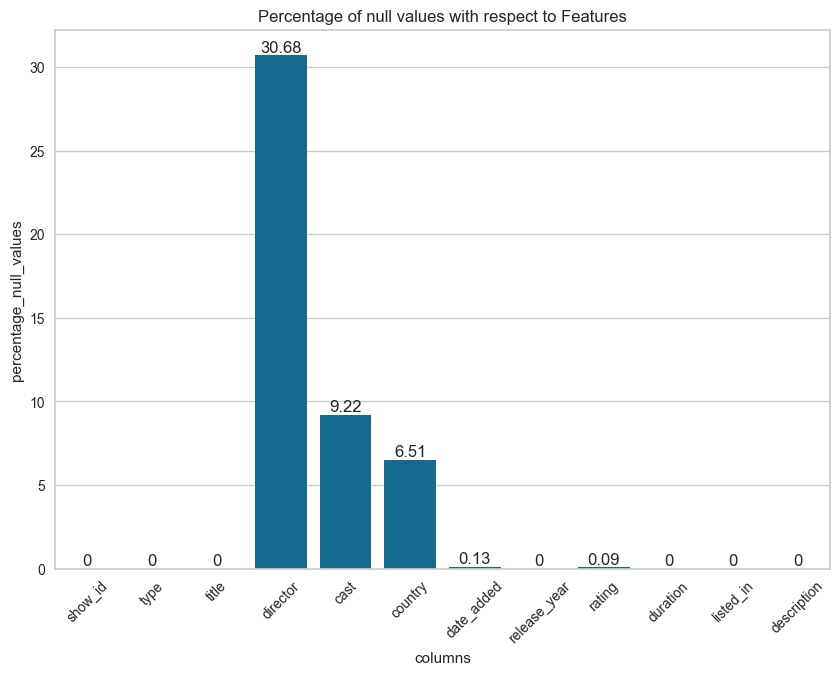

In [32]:
# Ploting number of null values with its variable
plt.figure(figsize=(10,7))
ax=sns.barplot(x='columns', y='percentage_null_values', data=null_df)
ax.bar_label(ax.containers[0])
plt.title('Percentage of null values with respect to Features')
plt.xticks(rotation= 45)
plt.show()

Text(0.5, 1.0, 'Missing values in the dataset with respect to its features')

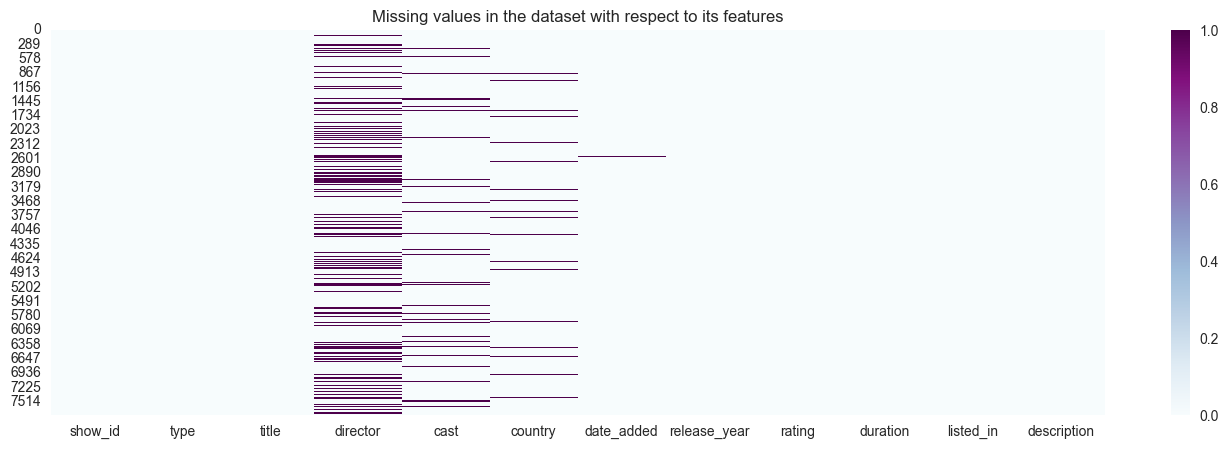

In [33]:
# Vizualizing the null values from the dataset
plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(),cbar=True, cmap='BuPu')
plt.title('Missing values in the dataset with respect to its features')

In [34]:
#checking category of features whoes having null values

# Defining target variables
null_variables=['director','cast','country','date_added','rating']
# Checking categories in each target feature
for var in null_variables:
    print(df[var].value_counts())
    print('~~'*45)

director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
                          ..
John Suits                 1
Ryan Koo                   1
Paul Greengrass            1
Swapnaneel Jayakar         1
Gilbert Chan               1
Name: count, Length: 4049, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cast
David Attenborough                                                                                                                       18
Samuel West                                                                                                                              10
Jeff Dunham                                                                                                                               7
Craig Sechler                                                                                                       

In [35]:
## Handling null values

# Filling null values of features director, cast and country
df.director.fillna("Director Unavailable",inplace=True)
df.cast.fillna("Cast Unavailable",inplace=True)
df.country.fillna("Country Unavailable",inplace=True)

# Dropping null values from date_added and rating columns
df.dropna(subset=["date_added",'rating'],inplace=True)

In [36]:
# Check for null values that were eliminated or were not successfully eliminated.
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [37]:
# Nullfree shape of dataset
df.shape

(7770, 12)

__________________________________________________________________________________________


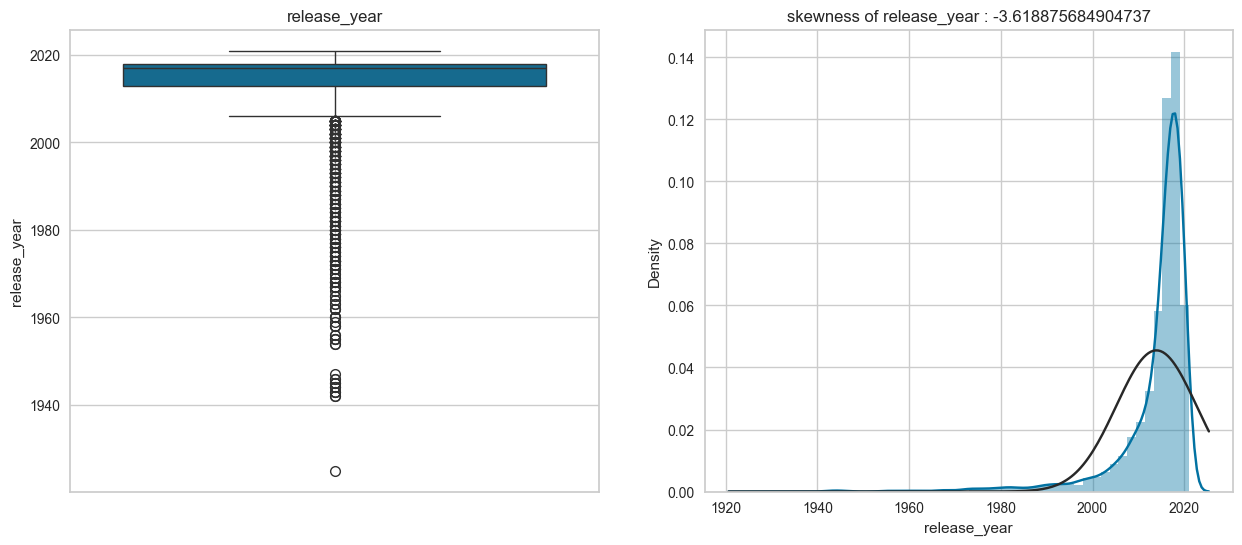

__________________________________________________________________________________________


In [38]:
# [3] Handling Outliers
## Checking for outliers in numerical variables using boxplot

# Importing library for checking normality in distribution
from scipy.stats import norm

# Plotting Box and Distribution plot using for loop
for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()
    print('__'*45)

In [40]:
## Using Inter Quartile Range for removing outliers from numerical variables

# Capping dataset
for i in numerical_variables:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR
    
    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

__________________________________________________________________________________________


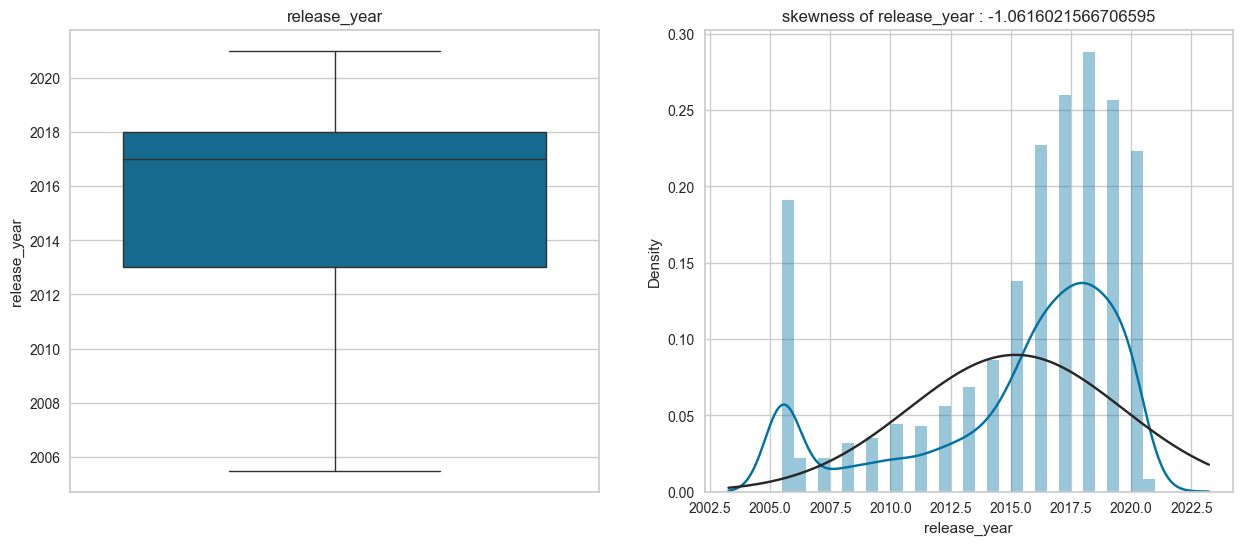

__________________________________________________________________________________________


In [41]:
## Using boxplot checking outliers in features after removed using IQR

for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()
    print('__'*45)

In [42]:
# [3] Feature Engineering
# Dataset
df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020        2020.0  TV-MA  4 Seasons   
1  December 23, 2016        2016.0  TV-MA     93 min   
2  December 20, 2018        2011.0      R     78 min   
3  November 16, 2017        2009.0  PG-13     80 min   
4    January 1, 2020        2008.0  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [43]:
# Ensure that features are in the correct data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7770 non-null   object 
 1   type          7770 non-null   object 
 2   title         7770 non-null   object 
 3   director      7770 non-null   object 
 4   cast          7770 non-null   object 
 5   country       7770 non-null   object 
 6   date_added    7770 non-null   object 
 7   release_year  7770 non-null   float64
 8   rating        7770 non-null   object 
 9   duration      7770 non-null   object 
 10  listed_in     7770 non-null   object 
 11  description   7770 non-null   object 
dtypes: float64(1), object(11)
memory usage: 789.1+ KB


In [44]:
# Converting the data types of features date_added and release_year to the appropriate data types
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df.release_year = df.release_year.astype('int64')

# Renaming name of variable listed_in to genre
df.rename = df.rename(columns={'listed_in':'geners'}, inplace=True)

In [45]:
## Adding new features based on feature date_added
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['day_added']=df['date_added'].dt.day

# Delete feature date_added
df=df.drop('date_added', axis='columns')
df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added  
0         14  
1         23  
2         20  
3         16  
4          1

In [46]:
# Exploratory data analysis
# Creating new dataframe having all TV shows
tv_shows_df = df[df.type=='TV Show']
tv_shows_df.head()

show_id     type   title              director  \
0       s1  TV Show      3%  Director Unavailable   
5       s6  TV Show      46           Serdar Akar   
11     s12  TV Show    1983  Director Unavailable   
12     s13  TV Show    1994  Diego Enrique Osorno   
16     s17  TV Show  Feb-09  Director Unavailable   

                                                 cast                country  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...                 Brazil   
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                 Turkey   
11  Robert Więckiewicz, Maciej Musiał, Michalina O...  Poland, United States   
12                                   Cast Unavailable                 Mexico   
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...    Country Unavailable   

    release_year rating   duration  \
0           2020  TV-MA  4 Seasons   
5           2016  TV-MA   1 Season   
11          2018  TV-MA   1 Season   
12          2019  TV-MA   1 Season   
16          2018  TV-14   1 Season   

                                               geners  \
0   International TV Shows, TV Dramas, TV Sci-Fi &...   
5     International TV Shows, TV Dramas, TV Mysteries   
11  Crime TV Shows, International TV Shows, TV Dramas   
12  Crime TV Shows, Docuseries, International TV S...   
16                  International TV Shows, TV Dramas   

                                          description  year_added  \
0   In a future where the elite inhabit an island ...        2020   
5   A genetics professor experiments with a treatm...        2017   
11  In this dark alt-history thriller, a naïve law...        2018   
12  Archival video and new interviews examine Mexi...        2019   
16  As a psychology professor faces Alzheimer's, h...        2019   

    month_added  day_added  
0             8         14  
5             7          1  
11           11         30  
12            5         17  
16            3         20

In [47]:
# Creating new dataframe having all movies
movies_df = df[df.type == 'Movie']
movies_df.head(2)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   

                                                cast    country  release_year  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico          2016   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore          2011   

  rating duration                               geners  \
1  TV-MA   93 min         Dramas, International Movies   
2      R   78 min  Horror Movies, International Movies   

                                         description  year_added  month_added  \
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   

   day_added  
1         23  
2         20

In [48]:
# [1] Univariate Analysis
# Defining r to autofit the number and size of plots
r = int(len(df.columns))

In [49]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

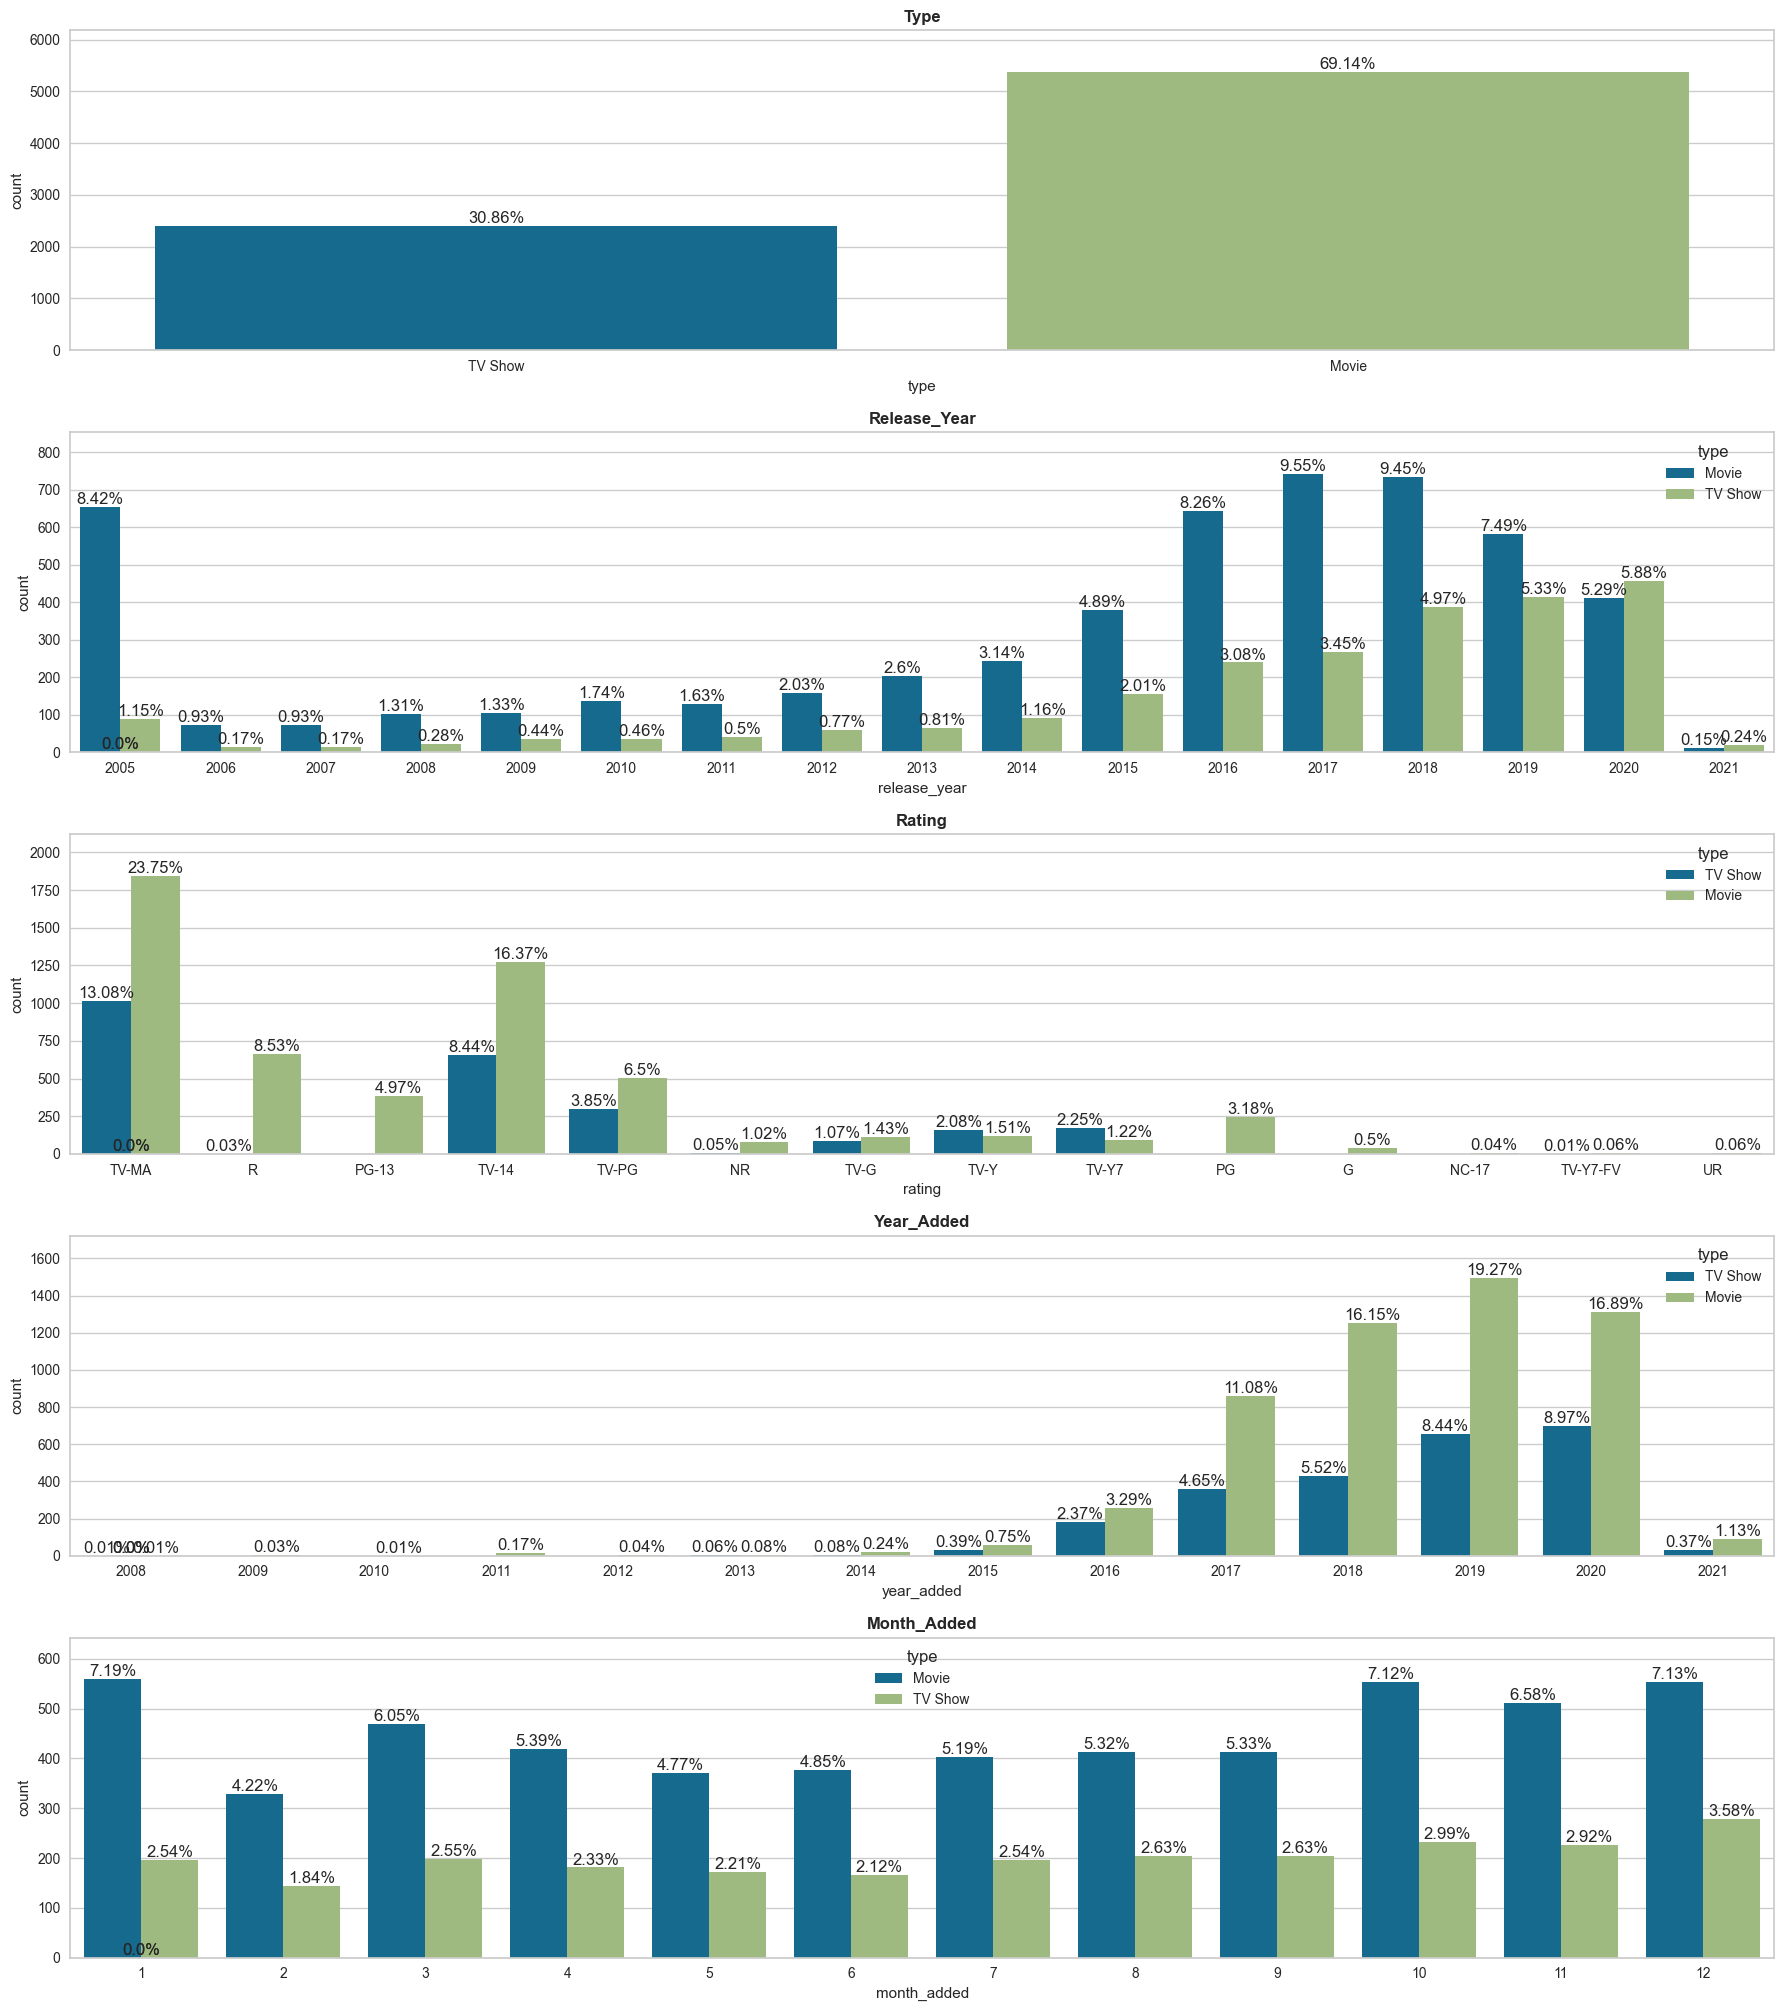

In [50]:
## Plotting the countplots for each variable in target_variables

# Obtaing target variables having maximum 20 categories in features
target_var=[var for var in df.columns if len(df[var].value_counts()) < 20]

plt.figure(figsize=(18,r*4))
for n,var in enumerate(target_var):
    plot = plt.subplot(r,1,n+1)
    ax=sns.countplot(x=df[var], hue=df['type']).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

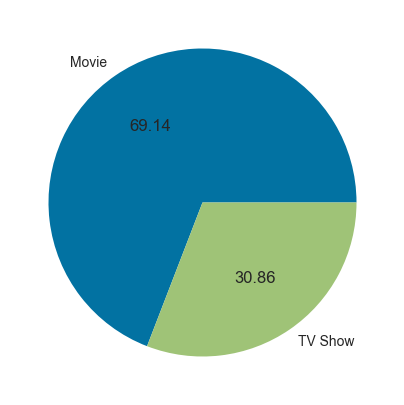

In [51]:
# [2] Bivariate Analysis
## Number of Movies and TV shows available on Netflix

# Defining figure size
plt.figure(figsize=(5,5))

# Declaring data
type_of_content =df.groupby(by='type').size()

# Plotting data
plt.pie(type_of_content,labels=['Movie','TV Show'],autopct='%.2f')

# Displaying chart
plt.show()

<Figure size 500x500 with 0 Axes>

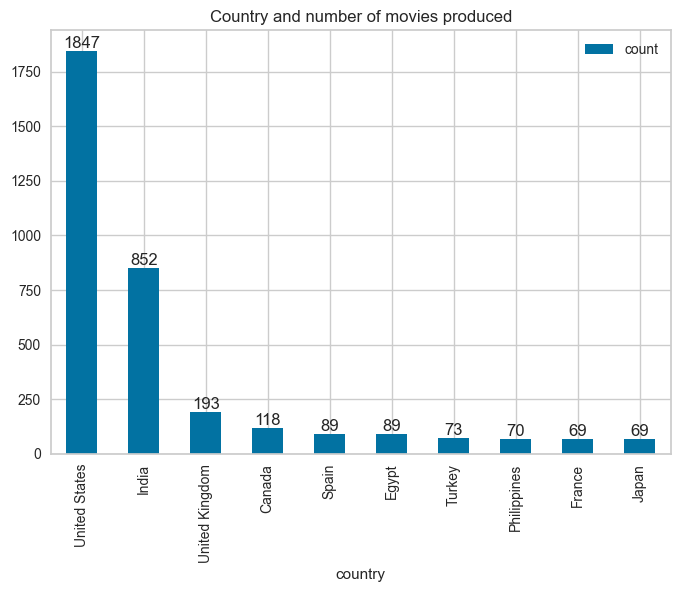

In [52]:
## The country where the majority of movies are produced

# Creating a dataframe for countries where movie are produced and counting them
movie_country_df=pd.DataFrame(movies_df.groupby(by='country').size()).sort_values(by= 0, ascending = False)
movie_country_df.rename(columns={0:'count'}, inplace=True)

# Removing observations where the country is unavailable
movie_country_df=movie_country_df[movie_country_df.index != 'Country Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting bar graph for top most 10 country
ax=movie_country_df.head(10).plot(kind='bar')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.title('Country and number of movies produced')

# Displaying plot
plt.show()

<Figure size 500x500 with 0 Axes>

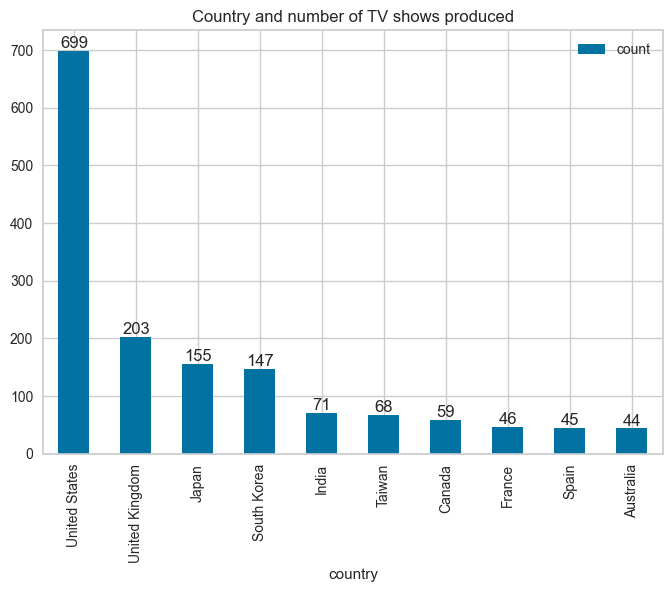

In [53]:
## The country where the majority of TV shows are produced

# Creating a dataframe for countries where TV shows are produced and counting them
tv_show_country_df=pd.DataFrame(tv_shows_df.groupby(by='country').size()).sort_values(by= 0, ascending = False)
tv_show_country_df.rename(columns={0:'count'}, inplace=True)

# Removing observations where the country is unavailable
tv_show_country_df=tv_show_country_df[tv_show_country_df.index != 'Country Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting bar graph for top most 10 country
ax=tv_show_country_df.head(10).plot(kind='bar')

# Assigning labels to the graph
plt.title('Country and number of TV shows produced')
ax.bar_label(ax.containers[0])

# Displaying plot
plt.show()

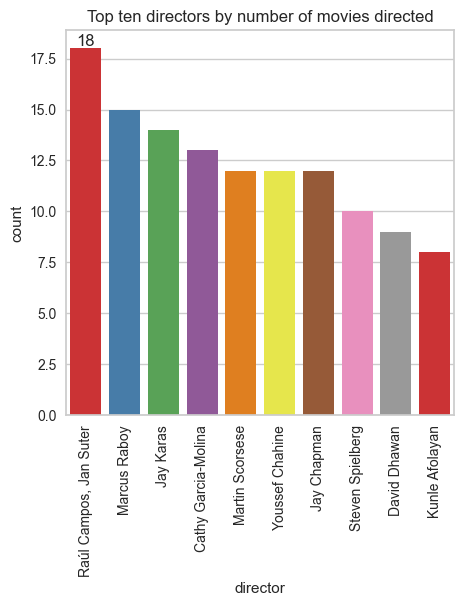

In [54]:
## The directors of the majority of movies

# Removing observations where the director is unavailable
movied_df=movies_df[movies_df['director'] != 'Director Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting count plot graph for top most 10 directors of movies
ax=sns.countplot(x=movied_df['director'], order=movied_df.director.value_counts().index[:10], palette='Set1')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten directors by number of movies directed')

# Displaying plot
plt.show()

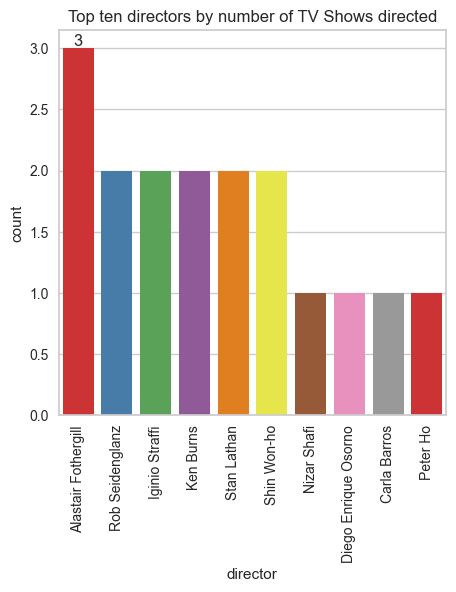

In [55]:
## The directors of the majority of TV Shows

# Removing observations where the director is unavailable
tv_shows_df=tv_shows_df[tv_shows_df['director'] != 'Director Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting count plot graph for top most 10 directors of TV Shows
ax=sns.countplot(x=tv_shows_df['director'], order=tv_shows_df.director.value_counts().index[:10],palette='Set1')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten directors by number of TV Shows directed')

# Displaying plot
plt.show()

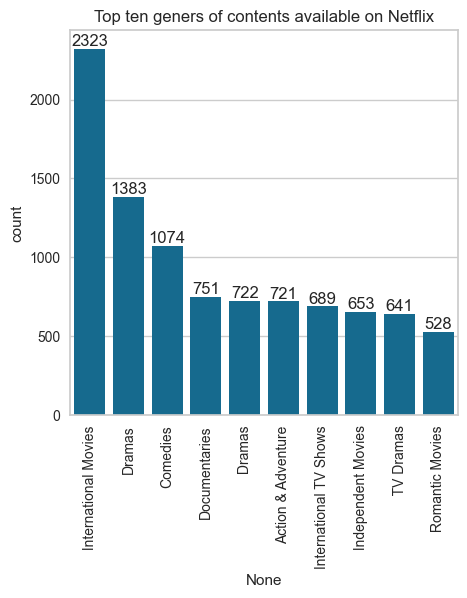

In [56]:
## Netflix's Most Popular Content Genres

# Creating a dataframe for geners
geners_df=df.geners.str.split(',', expand=True).unstack()

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting count plot graph for top most 10 geners of content available on Netflix
ax=sns.countplot(x=geners_df, order=geners_df.value_counts().index[:10])

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten geners of contents available on Netflix')

# Displaying plot
plt.show()

In [57]:
# Install worldcloud library in python envirnoment
!pip install wordcloud

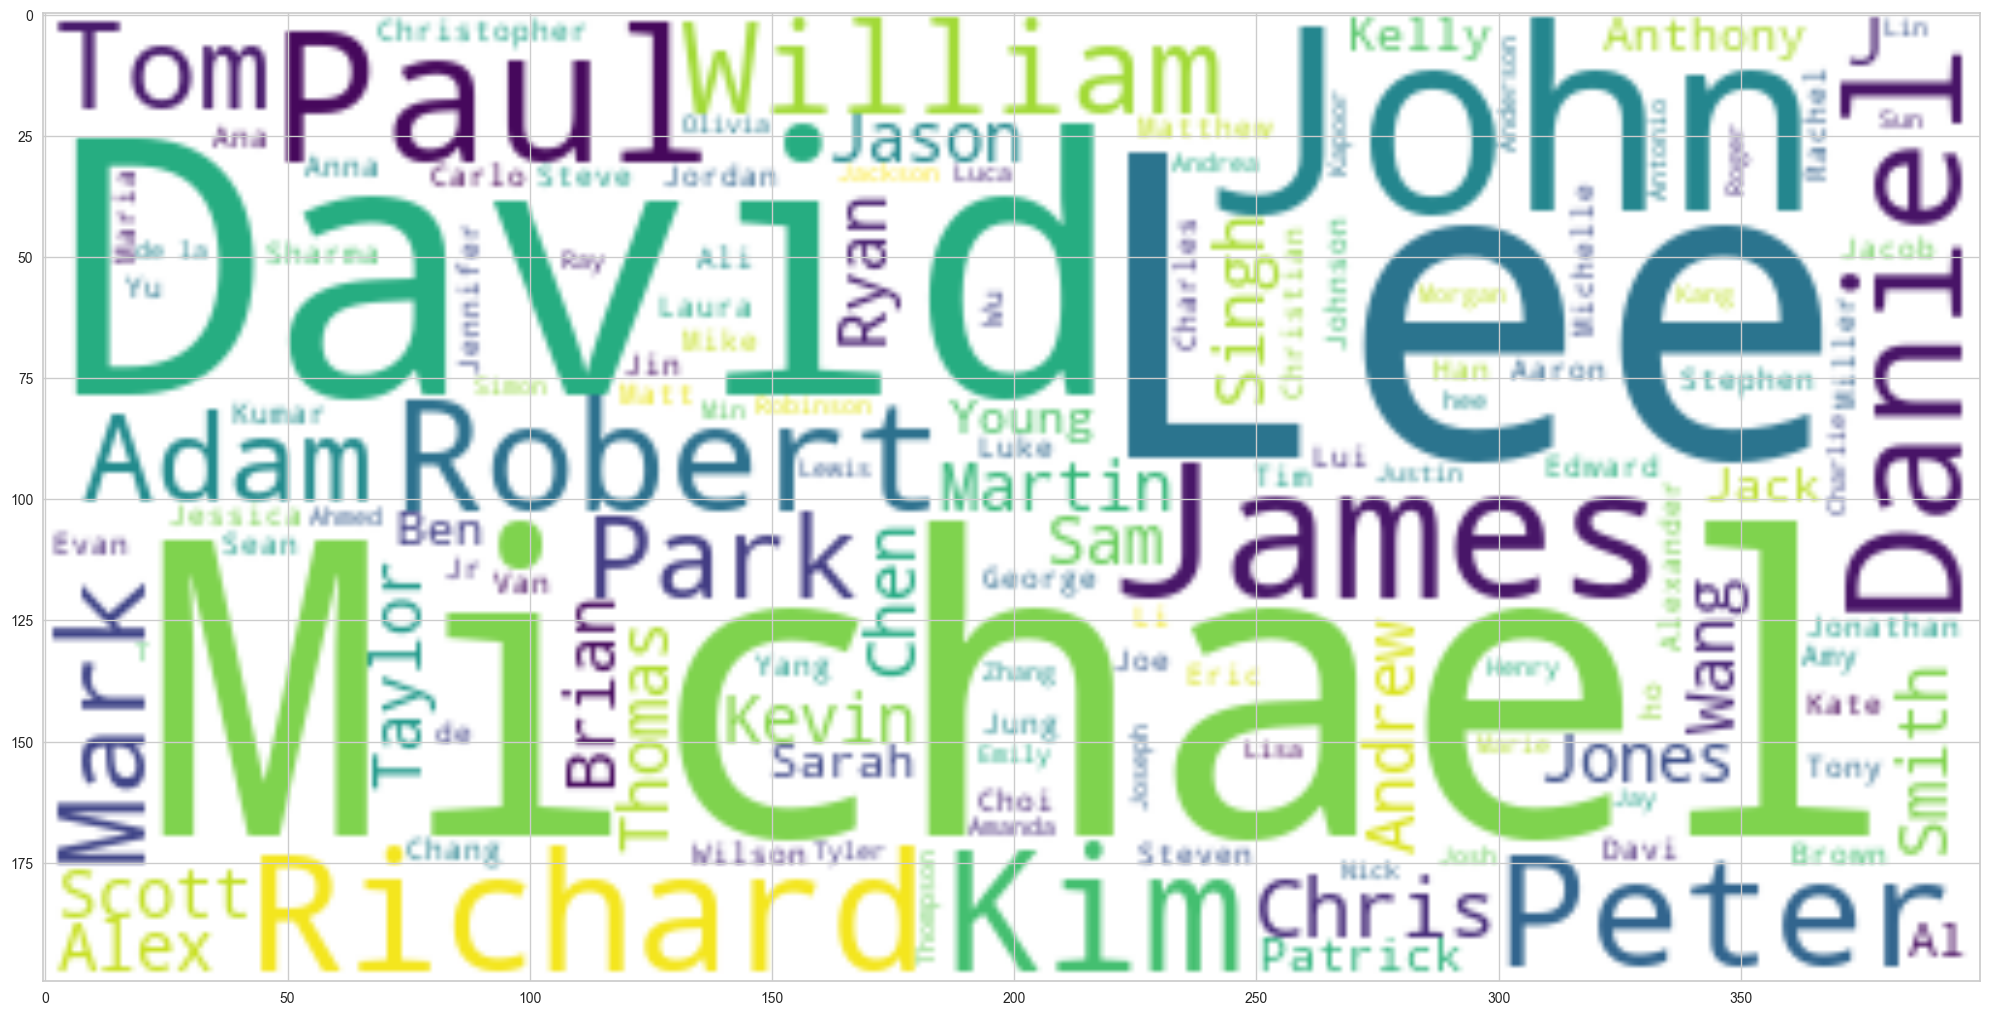

In [ ]:
## Wordcloud for actors involved in movies and TV Shows available on Netflix

# Import worldcloud library
from wordcloud import WordCloud

# Defining size of plot
plt.subplots(figsize=(25,15))

# Removing observations where the cast is unavailable
cast_df=df[df['cast'] != 'Cast Unavailable']

# Generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(','.join(cast_df.cast))

# Ploting graph
plt.imshow(wordcloud, interpolation="bilinear")

# Displaying plot
plt.show()

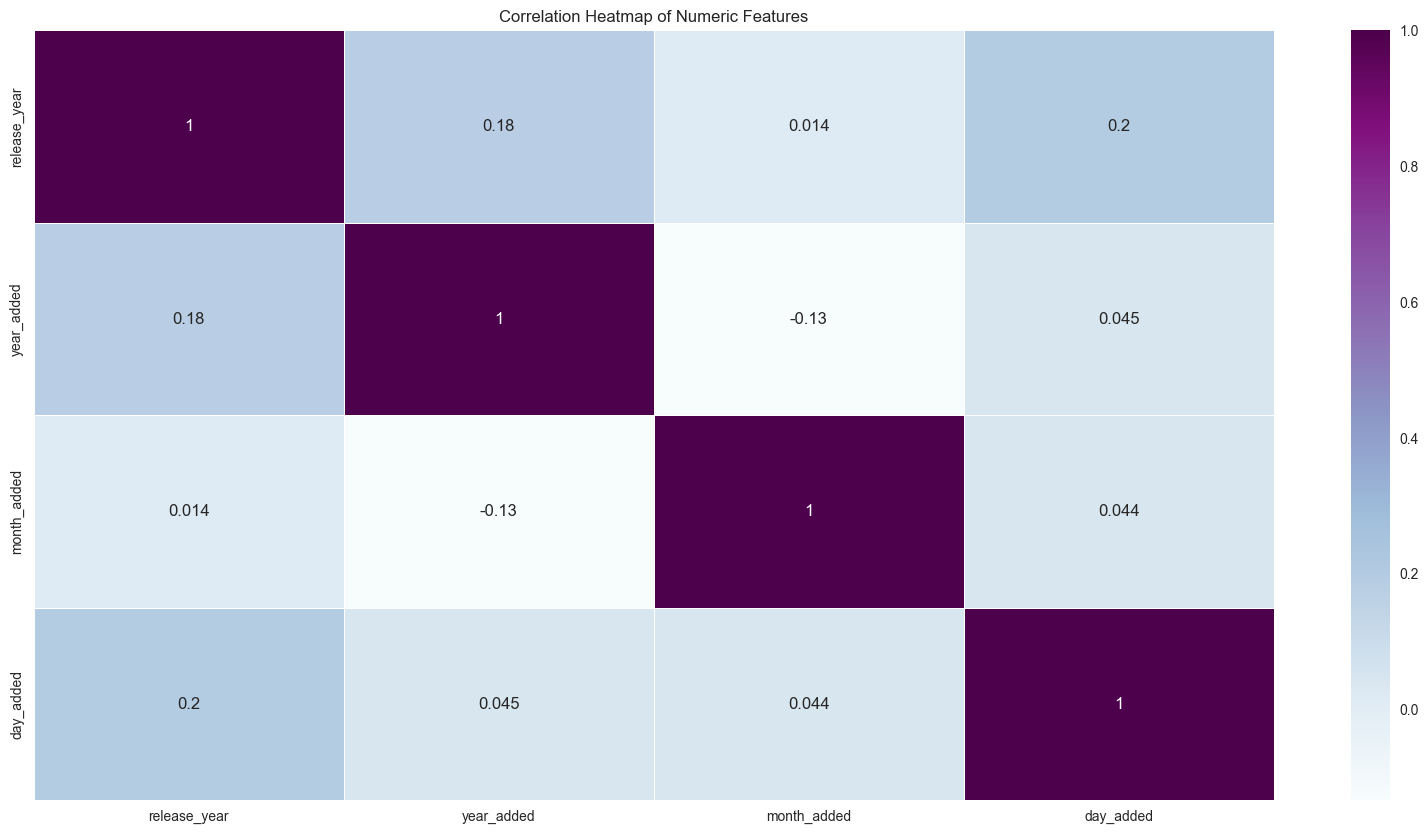

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Plot heatmap
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_matrix, ax=ax, annot=True, cmap='BuPu', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


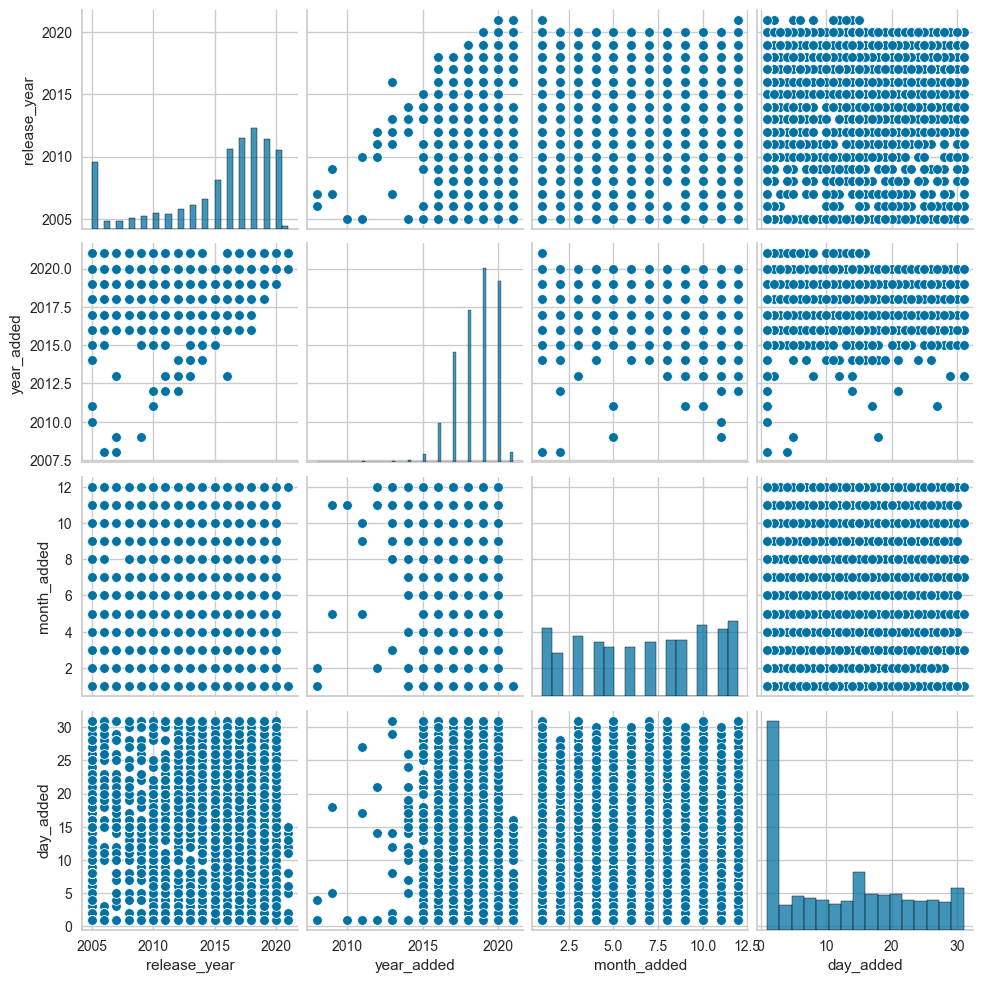

In [60]:
# Pair Plot visualization code
sns.pairplot(df, palette="husl")
plt.show()

In [61]:
# Data Pre-processing
# [1] Textual Data Preprocessing
## Creating new feature having length of words of description variable 
df['description_len'] = df['description'].apply(lambda x: len(x.split()))
df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added  description_len  
0         14               26  
1         23               24  
2         20               24  
3         16               23  
4          1               22

In [62]:
# Expand contraction
# Install contraction library in the envirnoment
!pip install contractions

In [63]:
## Function to expands contractions from the corpus

# import contractions library
import contractions

def contraction_process(corpus):
    '''Function which expands contractions from the corpus
    Args:
    corpus (string): corpus to which function is to be applied
    Returns:
    corpus with expanded contractions
    '''
    corpus = contractions.fix(corpus)
    return corpus

# Apply the contraction_process function to each examples in description variable
df['contractions_description']=df['description'].apply(contraction_process)
df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added  description_len  \
0         14               26   
1         23               24   
2         20               24   
3         16               23   
4          1               22   

                            contractions_description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [64]:
# [1.2] Lower Casing and Remove Stopwords and Punctuations
# Updating nltk library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vishal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
# Importing stopwords from nltk library
from nltk.corpus import stopwords
# Extracting the English stopwords from nltk library
stopwords = stopwords.words('english')
# Displaying the English stopwords
np.array(stopwords)

array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers',
       'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd",
       'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it',
       "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll',
       'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn',
       "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not',
       'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'ot

In [66]:
# Length of English stopwords
print("Number of English stopwords : ", len(stopwords))

Number of English stopwords :  198


In [67]:
# Import punctuations
import string
# Extracting punctuations
punctuations = string.punctuation
# Displaying the punctuations
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [68]:
## Creating new variable punctuation_% contain percentage of punctuations in each corpus
import string

def punctuation_count(txt):
    count = sum([1 for c in txt if c in punctuations])
    return 100*count/len(txt)

# Apply function to contractions_description variable
df['punctuation_%'] = df['contractions_description'].apply(lambda x: punctuation_count(x))
df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added  description_len  \
0         14               26   
1         23               24   
2         20               24   
3         16               23   
4          1               22   

                            contractions_description  punctuation_%  
0  In a future where the elite inhabit an island ...       2.205882  
1  After a devastating earthquake hits Mexico Cit...       1.351351  
2  When an army recruit is found dead, his fellow...       1.333333  
3  In a postapocalyptic world, rag-doll robots hi...       2.758621  
4  A brilliant group of students become card-coun...       1.398601

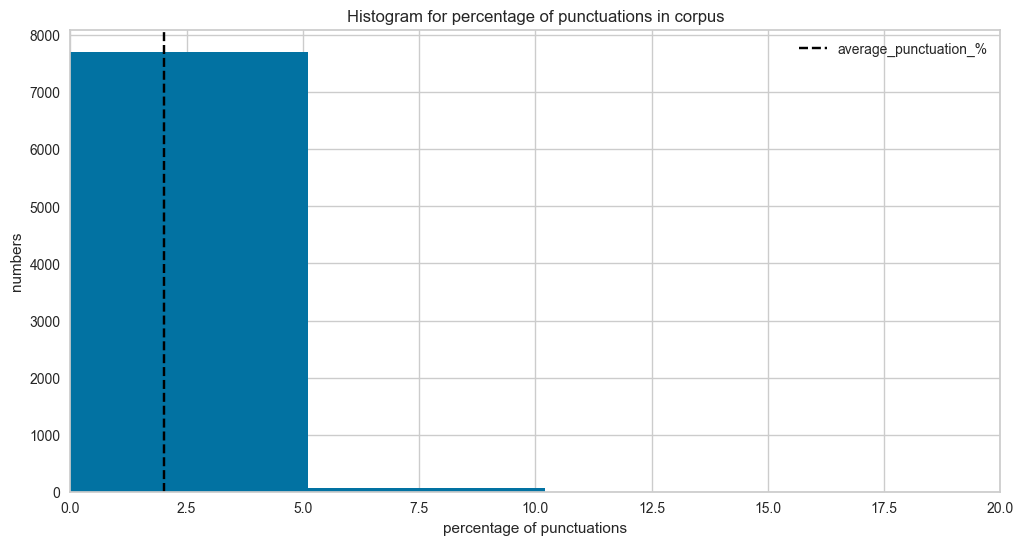

In [69]:
## Histogram for percentage of punctuations in contractions_description variable

# Define size of plot
plt.figure(figsize=(12,6))
bins = np.linspace(0, 250, 50)

# Plot histogram
plt.hist(df['punctuation_%'], bins)
plt.axvline(df['punctuation_%'].mean(), color='black', linestyle='dashed', label='average_punctuation_%')

# Labeling to plot
plt.title('Histogram for percentage of punctuations in corpus')
plt.xlabel('percentage of punctuations')
plt.ylabel('numbers')
plt.legend(loc='best')
plt.xlim(0,20)

# Display plot
plt.show()

In [70]:
## Function to remove stopwords and punctuations and lower casing to the corpus

def remove_stopwords_punctuations(corpus):
    '''Function which removes stopwords and punctuations and lower casing to the corpus
    Args:
    corpus (string) to which function is to be applied
    Returns:
    lowercase corpus without stopwords and punctuations
    '''
    nopunc =[char for char in corpus if char not in punctuations]
    nopunc=''.join(nopunc)
    return ' '.join([word.lower() for word in nopunc.split() if word.lower() not in stopwords])

# Apply the remove_stopwords_punctuations function to each instance in variable contractions_description
df['no_sw_pun_description']=df['contractions_description'].apply(remove_stopwords_punctuations)
df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added  description_len  \
0         14               26   
1         23               24   
2         20               24   
3         16               23   
4          1               22   

                            contractions_description  punctuation_%  \
0  In a future where the elite inhabit an island ...       2.205882   
1  After a devastating earthquake hits Mexico Cit...       1.351351   
2  When an army recruit is found dead, his fellow...       1.333333   
3  In a postapocalyptic world, rag-doll robots hi...       2.758621   
4  A brilliant group of students become card-coun...       1.398601   

                               no_sw_pun_description  
0  future elite inhabit island paradise far crowd...  
1  devastating earthquake hits mexico city trappe...  
2  army recruit found dead fellow soldiers forced...  
3  postapocalyptic world ragdoll robots hide fear...  
4  brilliant group students become cardcounting e...

In [71]:
# [1.3] Remove URLs
## Function to removes URL addresses from a corpus

# Import regex library
import re

def remove_URL(corpus):
    '''
    Removes URL addresses from a corpus, if present
    Args:
        corpus (string): String to which the function is to be applied
    Returns:
        clean string without URL addresses
    ''' 
    return re.sub(r'https?://\S+|www\.\S+', '', corpus)

# Apply the remove_URL function to each instance in variable no_sw_pun_description
df['clean_description']=df['no_sw_pun_description'].apply(remove_URL)
df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added  description_len  \
0         14               26   
1         23               24   
2         20               24   
3         16               23   
4          1               22   

                            contractions_description  punctuation_%  \
0  In a future where the elite inhabit an island ...       2.205882   
1  After a devastating earthquake hits Mexico Cit...       1.351351   
2  When an army recruit is found dead, his fellow...       1.333333   
3  In a postapocalyptic world, rag-doll robots hi...       2.758621   
4  A brilliant group of students become card-coun...       1.398601   

                               no_sw_pun_description  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                                   clean_description  
0  future elite inhabit island paradise far crowd...  
1  devastating earthquake hits mexico city trappe...  
2  army recruit found dead fellow soldiers forced...  
3  postapocalyptic world ragdoll robots hide fear...  
4  brilliant group students become cardcounting e...

In [72]:
# [1.4] Remove Emails
## Function to removes email addresses from a corpus

def remove_emails(corpus):
    '''
    Removes email addresses from a corpus, if present
    Args:
        corpus (string): String to which the function is to be applied
    Returns:
        clean string without email addresses
    ''' 
    corpus_split = corpus.split()
    return ' '.join([i for i in corpus_split if '@' not in i])

# Apply the remove_emails function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_emails)
df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added  description_len  \
0         14               26   
1         23               24   
2         20               24   
3         16               23   
4          1               22   

                            contractions_description  punctuation_%  \
0  In a future where the elite inhabit an island ...       2.205882   
1  After a devastating earthquake hits Mexico Cit...       1.351351   
2  When an army recruit is found dead, his fellow...       1.333333   
3  In a postapocalyptic world, rag-doll robots hi...       2.758621   
4  A brilliant group of students become card-coun...       1.398601   

                               no_sw_pun_description  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                                   clean_description  
0  future elite inhabit island paradise far crowd...  
1  devastating earthquake hits mexico city trappe...  
2  army recruit found dead fellow soldiers forced...  
3  postapocalyptic world ragdoll robots hide fear...  
4  brilliant group students become cardcounting e...

In [73]:
# [1.5] Removes HTML-Tags
## Function to removes HTML-Tags from a corpus

# Import BeautifulSoup library
from bs4 import BeautifulSoup

def remove_html_tags(corpus):
    '''
    Removes HTML-Tags from a corpus, if present
    Args:
        text (string): corpus to which the function is to be applied,
    Returns:
        Clean corpus without HTML-Tags
    ''' 
    return BeautifulSoup(corpus, 'html.parser').get_text()

# Apply the remove_html_tags function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_html_tags)
df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added  description_len  \
0         14               26   
1         23               24   
2         20               24   
3         16               23   
4          1               22   

                            contractions_description  punctuation_%  \
0  In a future where the elite inhabit an island ...       2.205882   
1  After a devastating earthquake hits Mexico Cit...       1.351351   
2  When an army recruit is found dead, his fellow...       1.333333   
3  In a postapocalyptic world, rag-doll robots hi...       2.758621   
4  A brilliant group of students become card-coun...       1.398601   

                               no_sw_pun_description  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                                   clean_description  
0  future elite inhabit island paradise far crowd...  
1  devastating earthquake hits mexico city trappe...  
2  army recruit found dead fellow soldiers forced...  
3  postapocalyptic world ragdoll robots hide fear...  
4  brilliant group students become cardcounting e...

In [74]:
# [1.6] Remove Special Characters
## Function to remove special characters

# Import regex library
import re

def remove_special_char(corpus):
    """Remove Special Characters from the corpus, if present
    args:
    corpus (string): corpus to which a function is to be applied
    return:
    clean corpus without  special characters
    """
    return re.sub(r"[^a-zA-Z0-9]"," ",corpus)

# Apply the remove_special_char function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_special_char)
df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added  description_len  \
0         14               26   
1         23               24   
2         20               24   
3         16               23   
4          1               22   

                            contractions_description  punctuation_%  \
0  In a future where the elite inhabit an island ...       2.205882   
1  After a devastating earthquake hits Mexico Cit...       1.351351   
2  When an army recruit is found dead, his fellow...       1.333333   
3  In a postapocalyptic world, rag-doll robots hi...       2.758621   
4  A brilliant group of students become card-coun...       1.398601   

                               no_sw_pun_description  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                                   clean_description  
0  future elite inhabit island paradise far crowd...  
1  devastating earthquake hits mexico city trappe...  
2  army recruit found dead fellow soldiers forced...  
3  postapocalyptic world ragdoll robots hide fear...  
4  brilliant group students become cardcounting e...

In [75]:
# [1.7] Removing Words and Digits Contain Digits
## Function to removes digits from a corpus

# Import regex library
import re


def remove_digits(corpus):
    '''
    Removes digits from a corpus, if present
    Args:
        corpus (string): corpus to which the function is to be applied
    Returns:
        Clean string without digits
    ''' 
    return re.sub('\w*\d\w*','',corpus)

# Apply the remove_digits function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_digits)
df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added  description_len  \
0         14               26   
1         23               24   
2         20               24   
3         16               23   
4          1               22   

                            contractions_description  punctuation_%  \
0  In a future where the elite inhabit an island ...       2.205882   
1  After a devastating earthquake hits Mexico Cit...       1.351351   
2  When an army recruit is found dead, his fellow...       1.333333   
3  In a postapocalyptic world, rag-doll robots hi...       2.758621   
4  A brilliant group of students become card-coun...       1.398601   

                               no_sw_pun_description  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                                   clean_description  
0  future elite inhabit island paradise far crowd...  
1  devastating earthquake hits mexico city trappe...  
2  army recruit found dead fellow soldiers forced...  
3  postapocalyptic world ragdoll robots hide fear...  
4  brilliant group students become cardcounting e...

In [76]:
# [1.8] Remove Whitespaces
## Function to removes extra whitespaces from a corpus

# Import regex library
import re

def remove_extra_whitespaces(corpus):
    '''
    Removes extra whitespaces from a corpus, if present
    Args:
        text (string): corpus to which the function is to be applied
    Returns:
        Clean string without extra whitespaces
    ''' 
    return re.sub(r'^\s*|\s\s*', ' ', corpus).strip()

# Apply the remove_extra_whitespaces function to each instance to variable clean_description
df['clean_description']=df['clean_description'].apply(remove_extra_whitespaces)
df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added  description_len  \
0         14               26   
1         23               24   
2         20               24   
3         16               23   
4          1               22   

                            contractions_description  punctuation_%  \
0  In a future where the elite inhabit an island ...       2.205882   
1  After a devastating earthquake hits Mexico Cit...       1.351351   
2  When an army recruit is found dead, his fellow...       1.333333   
3  In a postapocalyptic world, rag-doll robots hi...       2.758621   
4  A brilliant group of students become card-coun...       1.398601   

                               no_sw_pun_description  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                                   clean_description  
0  future elite inhabit island paradise far crowd...  
1  devastating earthquake hits mexico city trappe...  
2  army recruit found dead fellow soldiers forced...  
3  postapocalyptic world ragdoll robots hide fear...  
4  brilliant group students become cardcounting e...

In [45]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Vishal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [78]:
import nltk
nltk.download('punkt')

def tokenization_fun(corpus):
    '''
    Function tokenize corpus
    Args:
        corpus (string): corpus to which the function is to be applied
    Returns:
        tokenised corpus
    '''
    return nltk.word_tokenize(corpus)

# Apply the tokenization_fun function to each instance in variable clean_description
# df['clean_description'] = df['clean_description'].str.lower().str.replace(r'[^\w\s]', '', regex=True)
df['tokenized_description']=df['clean_description'].apply(tokenization_fun)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vishal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added  description_len  \
0         14               26   
1         23               24   
2         20               24   
3         16               23   
4          1               22   

                            contractions_description  punctuation_%  \
0  In a future where the elite inhabit an island ...       2.205882   
1  After a devastating earthquake hits Mexico Cit...       1.351351   
2  When an army recruit is found dead, his fellow...       1.333333   
3  In a postapocalyptic world, rag-doll robots hi...       2.758621   
4  A brilliant group of students become card-coun...       1.398601   

                               no_sw_pun_description  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                                   clean_description  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                               tokenized_description  
0  [future, elite, inhabit, island, paradise, far...  
1  [devastating, earthquake, hits, mexico, city, ...  
2  [army, recruit, found, dead, fellow, soldiers,...  
3  [postapocalyptic, world, ragdoll, robots, hide...  
4  [brilliant, group, students, become, cardcount...

In [80]:
## Function to perform stemming operation on corpus

# Import lirary
from nltk.stem.porter import PorterStemmer

# Create object for stemming
porter_stemmer = PorterStemmer()

# Creating function for stemming
def stemming(tokenized_text):
    '''Function which stem each word in token'''
    text = [porter_stemmer.stem(word) for word in tokenized_text]
    return text

In [81]:
## Function to perform lemmatization operation on corpus

# Import lirary
import nltk
from nltk.stem import WordNetLemmatizer

# Download all nltk corpuses
nltk.download('wordnet')
nltk.download('omw-1.4')

# Create object for lemmatization
lemmatizer = WordNetLemmatizer()

# Creating function for lemmatization
def lemmatization(tokenized_text):
    '''Function which lemmatize each word in token'''
    text = [lemmatizer.lemmatize(word, pos="v") for word in tokenized_text]
    return text

# Apply the lemmatization function to each instance in variable tokenized_description
df['lemmatized_description'] = df['tokenized_description'].apply(lambda x : lemmatization(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vishal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Vishal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  ... year_added  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...  ...       2020   
1                       Dramas, International Movies  ...       2016   
2                Horror Movies, International Movies  ...       2018   
3  Action & Adventure, Independent Movies, Sci-Fi...  ...       2017   
4                                             Dramas  ...       2020   

   month_added  day_added  description_len  \
0            8         14               26   
1           12         23               24   
2           12         20               24   
3           11         16               23   
4            1          1               22   

                            contractions_description punctuation_%  \
0  In a future where the elite inhabit an island ...      2.205882   
1  After a devastating earthquake hits Mexico Cit...      1.351351   
2  When an army recruit is found dead, his fellow...      1.333333   
3  In a postapocalyptic world, rag-doll robots hi...      2.758621   
4  A brilliant group of students become card-coun...      1.398601   

                               no_sw_pun_description  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                                   clean_description  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                               tokenized_description  \
0  [future, elite, inhabit, island, paradise, far...   
1  [devastating, earthquake, hits, mexico, city, ...   
2  [army, recruit, found, dead, fellow, soldiers,...   
3  [postapocalyptic, world, ragdoll, robots, hide...   
4  [brilliant, group, students, become, cardcount...   

                              lemmatized_description  
0  [future, elite, inhabit, island, paradise, far...  
1  [devastate, earthquake, hit, mexico, city, tra...  
2  [army, recruit, find, dead, fellow, soldier, f...  
3  [postapocalyptic, world, ragdoll, robots, hide...  
4  [brilliant, group, students, become, cardcount...  

[5 rows x 21 columns]

In [82]:
## Creating new feature which Join all words back together in string in each row
df['final_description'] = df['lemmatized_description'].apply(lambda x: ' '.join(x))
df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  ... month_added  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...  ...           8   
1                       Dramas, International Movies  ...          12   
2                Horror Movies, International Movies  ...          12   
3  Action & Adventure, Independent Movies, Sci-Fi...  ...          11   
4                                             Dramas  ...           1   

   day_added  description_len  \
0         14               26   
1         23               24   
2         20               24   
3         16               23   
4          1               22   

                            contractions_description  punctuation_%  \
0  In a future where the elite inhabit an island ...       2.205882   
1  After a devastating earthquake hits Mexico Cit...       1.351351   
2  When an army recruit is found dead, his fellow...       1.333333   
3  In a postapocalyptic world, rag-doll robots hi...       2.758621   
4  A brilliant group of students become card-coun...       1.398601   

                               no_sw_pun_description  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                                   clean_description  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                               tokenized_description  \
0  [future, elite, inhabit, island, paradise, far...   
1  [devastating, earthquake, hits, mexico, city, ...   
2  [army, recruit, found, dead, fellow, soldiers,...   
3  [postapocalyptic, world, ragdoll, robots, hide...   
4  [brilliant, group, students, become, cardcount...   

                              lemmatized_description  \
0  [future, elite, inhabit, island, paradise, far...   
1  [devastate, earthquake, hit, mexico, city, tra...   
2  [army, recruit, find, dead, fellow, soldier, f...   
3  [postapocalyptic, world, ragdoll, robots, hide...   
4  [brilliant, group, students, become, cardcount...   

                                   final_description  
0  future elite inhabit island paradise far crowd...  
1  devastate earthquake hit mexico city trap surv...  
2  army recruit find dead fellow soldier force co...  
3  postapocalyptic world ragdoll robots hide fear...  
4  brilliant group students become cardcounting e...  

[5 rows x 22 columns]

In [83]:
## Creating new feature having length of words of variable final_description after joining back to string 
df['final_description_len'] = df['final_description'].apply(lambda x: len(x.split()))
df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  ... day_added  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...  ...        14   
1                       Dramas, International Movies  ...        23   
2                Horror Movies, International Movies  ...        20   
3  Action & Adventure, Independent Movies, Sci-Fi...  ...        16   
4                                             Dramas  ...         1   

   description_len                           contractions_description  \
0               26  In a future where the elite inhabit an island ...   
1               24  After a devastating earthquake hits Mexico Cit...   
2               24  When an army recruit is found dead, his fellow...   
3               23  In a postapocalyptic world, rag-doll robots hi...   
4               22  A brilliant group of students become card-coun...   

   punctuation_%                              no_sw_pun_description  \
0       2.205882  future elite inhabit island paradise far crowd...   
1       1.351351  devastating earthquake hits mexico city trappe...   
2       1.333333  army recruit found dead fellow soldiers forced...   
3       2.758621  postapocalyptic world ragdoll robots hide fear...   
4       1.398601  brilliant group students become cardcounting e...   

                                   clean_description  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                               tokenized_description  \
0  [future, elite, inhabit, island, paradise, far...   
1  [devastating, earthquake, hits, mexico, city, ...   
2  [army, recruit, found, dead, fellow, soldiers,...   
3  [postapocalyptic, world, ragdoll, robots, hide...   
4  [brilliant, group, students, become, cardcount...   

                              lemmatized_description  \
0  [future, elite, inhabit, island, paradise, far...   
1  [devastate, earthquake, hit, mexico, city, tra...   
2  [army, recruit, find, dead, fellow, soldier, f...   
3  [postapocalyptic, world, ragdoll, robots, hide...   
4  [brilliant, group, students, become, cardcount...   

                                   final_description final_description_len  
0  future elite inhabit island paradise far crowd...                    14  
1  devastate earthquake hit mexico city trap surv...                    15  
2  army recruit find dead fellow soldier force co...                    15  
3  postapocalyptic world ragdoll robots hide fear...                    13  
4  brilliant group students become cardcounting e...                    14  

[5 rows x 23 columns]

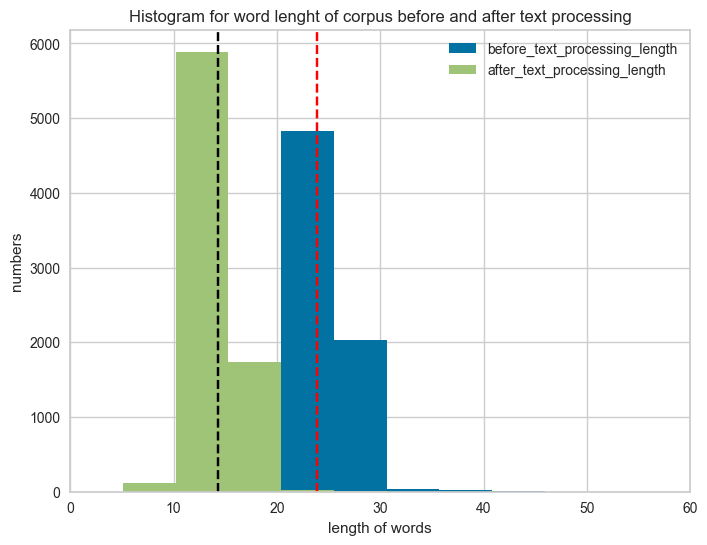

In [ ]:
## Histogram for lenght of word before and after text processing

# Define figure size
plt.figure(figsize=(8,6))
bins = np.linspace(0, 250, 50)

# Plot histograms
plt.hist(df['description_len'], bins, label='before_text_processing_length')
plt.hist(df['final_description_len'], bins, label='after_text_processing_length')

# Plot vertically mean
plt.axvline(df['description_len'].mean(), color='red', linestyle='dashed')
plt.axvline(df['final_description_len'].mean(), color='black', linestyle='dashed')

# Labeling plot
plt.title('Histogram for word lenght of corpus before and after text processing')
plt.xlabel('length of words')
plt.ylabel('numbers')
plt.legend(loc='best')
plt.xlim(0,60)

# Display the plot
plt.show()

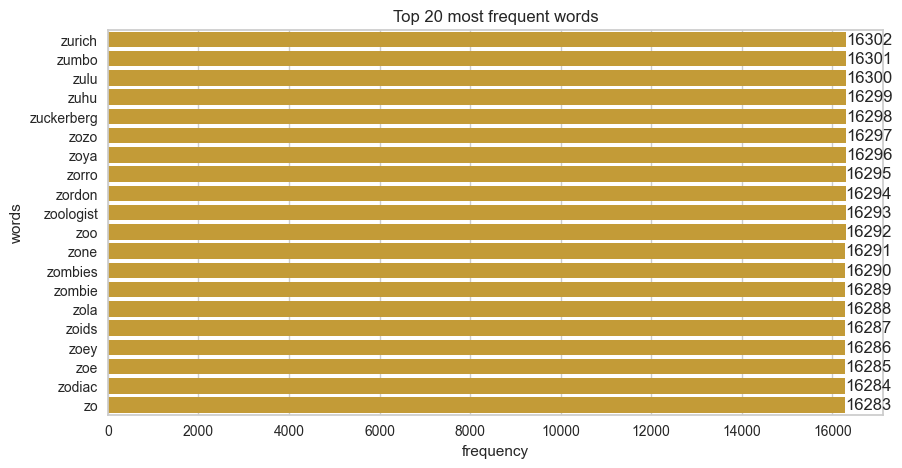

In [ ]:
#### Top words after cleaning text

## Collect vocabulary count

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
X = tfid_vectorizer.fit(df['final_description'])

# Collect the vocabulary items used in the vectorizer
dictionary = X.vocabulary_.items()

## Bar plot of top words after cleaning text

# Lists to store the vocab and counts
vocab = []
count = []

# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)

# Store the count in panadas dataframe with vocab as index
vocab_count_df = pd.Series(count, index=vocab)

# Sort the dataframe
vocab_count_df= vocab_count_df.sort_values(ascending=False)

# Top 20 vocab
top_vacab = vocab_count_df.head(20)

# Plot of the top 20 vocab
plt.figure(figsize=(10,5))
ax=sns.barplot(y=top_vacab.index, x=top_vacab.values, color='goldenrod')
ax.set_title('Top 20 most frequent words')
ax.set_xlabel('frequency')
ax.set_ylabel('words')
ax.bar_label(ax.containers[0])
plt.show()


In [86]:
## Vetorization

# Extract the tfid representation matrix of the text data

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the object of tfid vectorizer
vectorizer=TfidfVectorizer()

# Fit the vectorizer using the text data
X_tfidf = vectorizer.fit_transform(df['final_description'])

In [87]:
# Collect the tfid matrix in numpy array
X_array = X_tfidf.toarray()
X_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.32029921,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(7770, 16303))

In [88]:
# Shape of the array
X_array.shape

(7770, 16303)

In [89]:
# Store the tf-idf array into pandas dataframe
dataset = pd.DataFrame(X_array, columns = vectorizer.get_feature_names_out())
dataset.head()

aaliya  aamir  aang  aardman  aaron  abad  abagnale  abah  abandon  \
0     0.0    0.0   0.0      0.0    0.0   0.0       0.0   0.0      0.0   
1     0.0    0.0   0.0      0.0    0.0   0.0       0.0   0.0      0.0   
2     0.0    0.0   0.0      0.0    0.0   0.0       0.0   0.0      0.0   
3     0.0    0.0   0.0      0.0    0.0   0.0       0.0   0.0      0.0   
4     0.0    0.0   0.0      0.0    0.0   0.0       0.0   0.0      0.0   

   abandonment  ...  zoologist  zordon  zorro  zoya  zozo  zuckerberg  zuhu  \
0          0.0  ...        0.0     0.0    0.0   0.0   0.0         0.0   0.0   
1          0.0  ...        0.0     0.0    0.0   0.0   0.0         0.0   0.0   
2          0.0  ...        0.0     0.0    0.0   0.0   0.0         0.0   0.0   
3          0.0  ...        0.0     0.0    0.0   0.0   0.0         0.0   0.0   
4          0.0  ...        0.0     0.0    0.0   0.0   0.0         0.0   0.0   

   zulu  zumbo  zurich  
0   0.0    0.0     0.0  
1   0.0    0.0     0.0  
2   0.0    0.0     0.0  
3   0.0    0.0     0.0  
4   0.0    0.0     0.0  

[5 rows x 16303 columns]

In [90]:
# Defining input data to models
X=dataset.values

In [91]:
# First five instances of input data
X[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5, 16303))

In [93]:
## Function to evaluate and visualize evaluation metrics of the model

# Import necessary dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering_model(model, X , y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)
    
    # Data 
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')

    # Create a plot
    # Creating silhouette visualizer
    visualizer = SilhouetteVisualizer(model)
    visualizer.fit(X)    
    visualizer.poof()
    print('~~'*45)
    
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)
    
    return {'Num_clusters':len(set(y_predict)),'y_predict':y_predict, 'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}

In [95]:
## Function to visualise clusters

def visualize_clusters(X, y_predict):
    # X is a 2D array of data points
    # y_predict is a 1D array of integer labels indicating which cluster each data point belongs to

    # Create a scatter plot of the data points, colored by their assigned cluster label
    plt.scatter(X[:, 0], X[:, 1], c=y_predict, cmap='rainbow')

    # Show the plot
    plt.show()

In [96]:
# Elbow Method

# Install yellowbrick library
!pip install yellowbrick

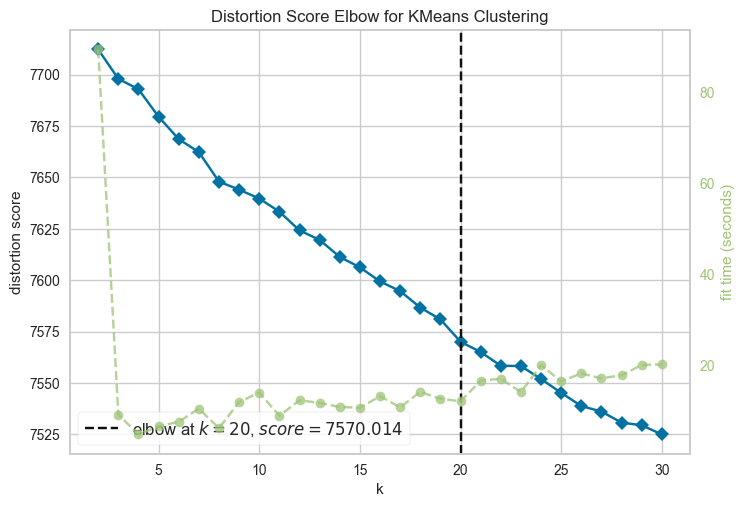

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [97]:
## Finding the optimal number of clusters using the Elbow Method

# Import from KMeans algoritham and KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Instantiate the clustering model and visualizer
KMeans_model = KMeans(random_state=42)
elb_visualizer = kelbow_visualizer(KMeans_model, X, k=(2,31), locate_elbow=True)

# Display figure
elb_visualizer.show()

# elb_visualizer.poof()

In [98]:
# Optimal number of cluster
elbow_optimal_K=elb_visualizer.elbow_value_
print(f'Optimal number of cluster using Elbow method : {elbow_optimal_K}')

Optimal number of cluster using Elbow method : 20


In [99]:
# Silhouette Score Method

## Finding the optimal number of clusters using the Silhouette Score Method

# Import from KMeans algoritham and metric silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

num_of_cluster=range(2,31)

for i in num_of_cluster:
    clusterer=KMeans(n_clusters=i)
    preds=clusterer.fit_predict(X)
    centers=clusterer.cluster_centers_
    score=silhouette_score(X, preds)
    print(f"For number of clusters = {i}, silhouette score is {score}")

For number of clusters = 2, silhouette score is 0.0009730263663234186
For number of clusters = 3, silhouette score is 0.0009862395101788858
For number of clusters = 4, silhouette score is 0.001231255481743792
For number of clusters = 5, silhouette score is 0.001667798748622445
For number of clusters = 6, silhouette score is 0.001994721345552352
For number of clusters = 7, silhouette score is 0.002544944433321952
For number of clusters = 8, silhouette score is 0.0025092169765130257
For number of clusters = 9, silhouette score is 0.0029287075039687496
For number of clusters = 10, silhouette score is 0.0033735171027607334
For number of clusters = 11, silhouette score is 0.0031806808924817586
For number of clusters = 12, silhouette score is 0.003305002706497677
For number of clusters = 13, silhouette score is 0.0036698786957625137
For number of clusters = 14, silhouette score is 0.003918523310424888
For number of clusters = 15, silhouette score is 0.004020602503374997
For number of cluster

In [100]:
# Optimal number of cluster
silhouette_optimal_K=30
print(f'Optimal number of cluster using the Silhouette Score Method : {silhouette_optimal_K}')

Optimal number of cluster using the Silhouette Score Method : 30


In [101]:
## Training the K-means model on a dataset for number of clusters K=17

# Import dependancy
from sklearn.cluster import KMeans
# Fitting model
kmeans = KMeans(n_clusters=17, init='k-means++', random_state= 42)
kmeans.fit(X)

KMeans(n_clusters=17, random_state=42)

In [102]:
# Centers of the clusters of the model
kmeans_centers=kmeans.cluster_centers_
kmeans_centers

array([[-4.74338450e-20,  1.21972744e-19,  2.71050543e-20, ...,
        -7.45388994e-20,  9.48676901e-20,  6.09863722e-20],
       [ 5.69206141e-19,  1.18349694e-04, -1.52465931e-18, ...,
         1.24409417e-04,  1.14310923e-04,  1.21645480e-04],
       [-3.38813179e-20,  1.08420217e-19,  2.71050543e-20, ...,
        -4.06575815e-20,  6.09863722e-20,  2.71050543e-20],
       ...,
       [-5.42101086e-20,  1.21972744e-19,  2.71050543e-20, ...,
        -6.77626358e-20,  8.80914265e-20,  5.42101086e-20],
       [-1.35525272e-20,  1.08420217e-19,  1.47444668e-03, ...,
         6.77626358e-21,  2.03287907e-20, -1.35525272e-20],
       [-1.42301535e-19,  1.35525272e-19,  2.71050543e-20, ...,
         1.21972744e-19, -2.71050543e-20, -1.49077799e-19]],
      shape=(17, 16303))

In [103]:
# Inertia of the model
kmeans_inertia=kmeans.inertia_
kmeans_inertia

7594.696901210741

In [109]:
# Predict result
y_predict= kmeans.predict(X)
y_predict

array([13, 16,  1, ...,  9,  1,  9], shape=(7770,), dtype=int32)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Evaluation result :

Number of clusters: 17
Silhouette score: 0.004121238530764757
Calinski-Harabasz score: 8.138140469672047
Davies-Bouldin score: 11.90644232615603
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+----+-------------------------+-------------+
|    | Evaluation Metrics      |      Result |
+====+=========================+=============+
|  0 | Silhouette score        |  0.00412124 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz score |  8.13814    |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin score    | 11.9064     |
+----+-------------------------+-------------+

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



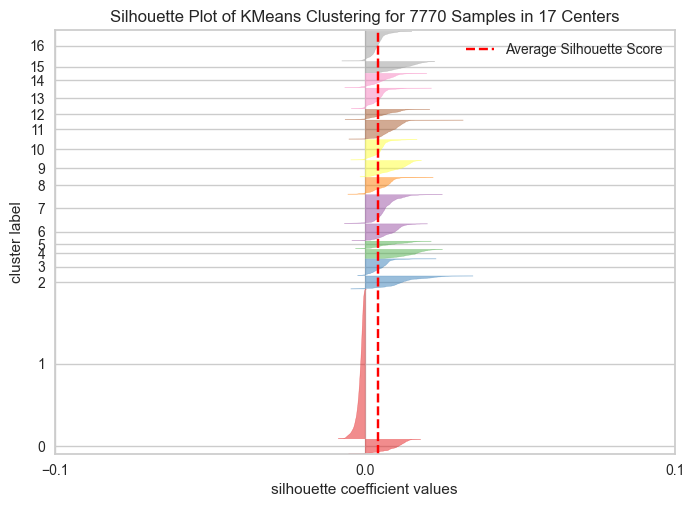

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


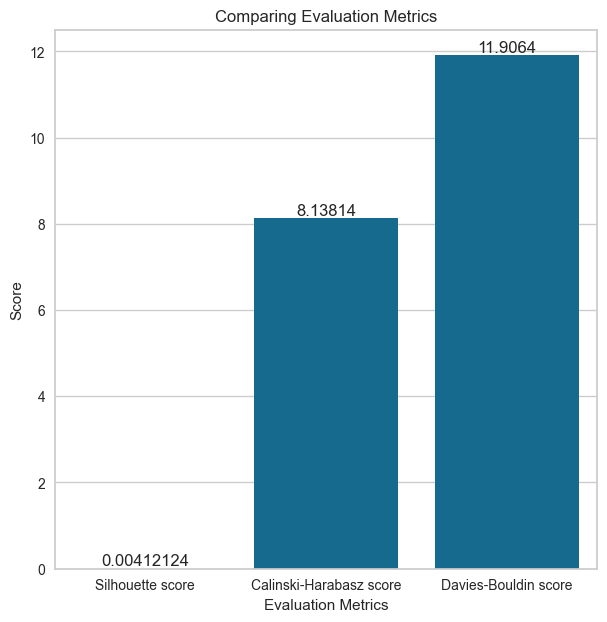

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [110]:
# Evaluation of Model
Kmeans_eval=evaluate_clustering_model(kmeans, X, y_predict)

In [111]:
## Assigne Movies and TV Shows to its cluster


# Copy dataset
kmeans_df=df.copy()

# Droping non original features from dataset
kmeans_df.drop(columns={'description_len','contractions_description', 'punctuation_%', 'no_sw_pun_description',
                        'clean_description', 'tokenized_description', 'lemmatized_description',
                        'final_description', 'final_description_len'}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
kmeans_df['cluster'] = kmeans.labels_
kmeans_df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added  cluster  
0         14       13  
1         23       16  
2         20        1  
3         16        8  
4          1        8

Text(0, 0.5, 'Number of Movies / TV Shows')

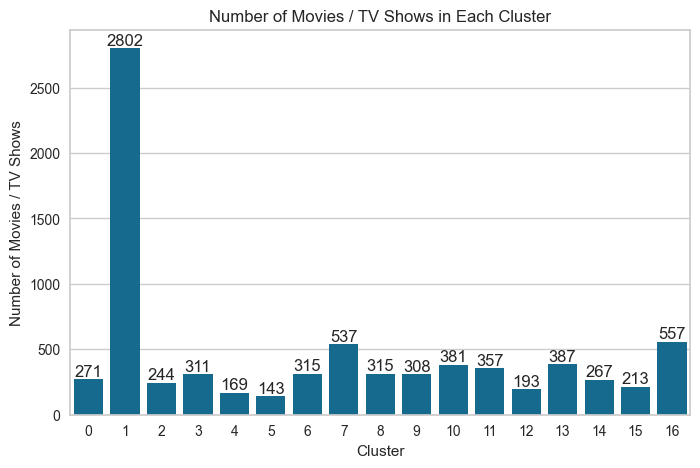

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count number of items in each cluster
num_datapoint_in_clusters = kmeans_df['cluster'].value_counts().reset_index()

# Step 2: Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='cluster', y='count', data=num_datapoint_in_clusters)
ax.bar_label(ax.containers[0])

# Step 3: Labels and title
ax.set_title("Number of Movies / TV Shows in Each Cluster")
ax.set_xlabel("Cluster")
ax.set_ylabel("Number of Movies / TV Shows")


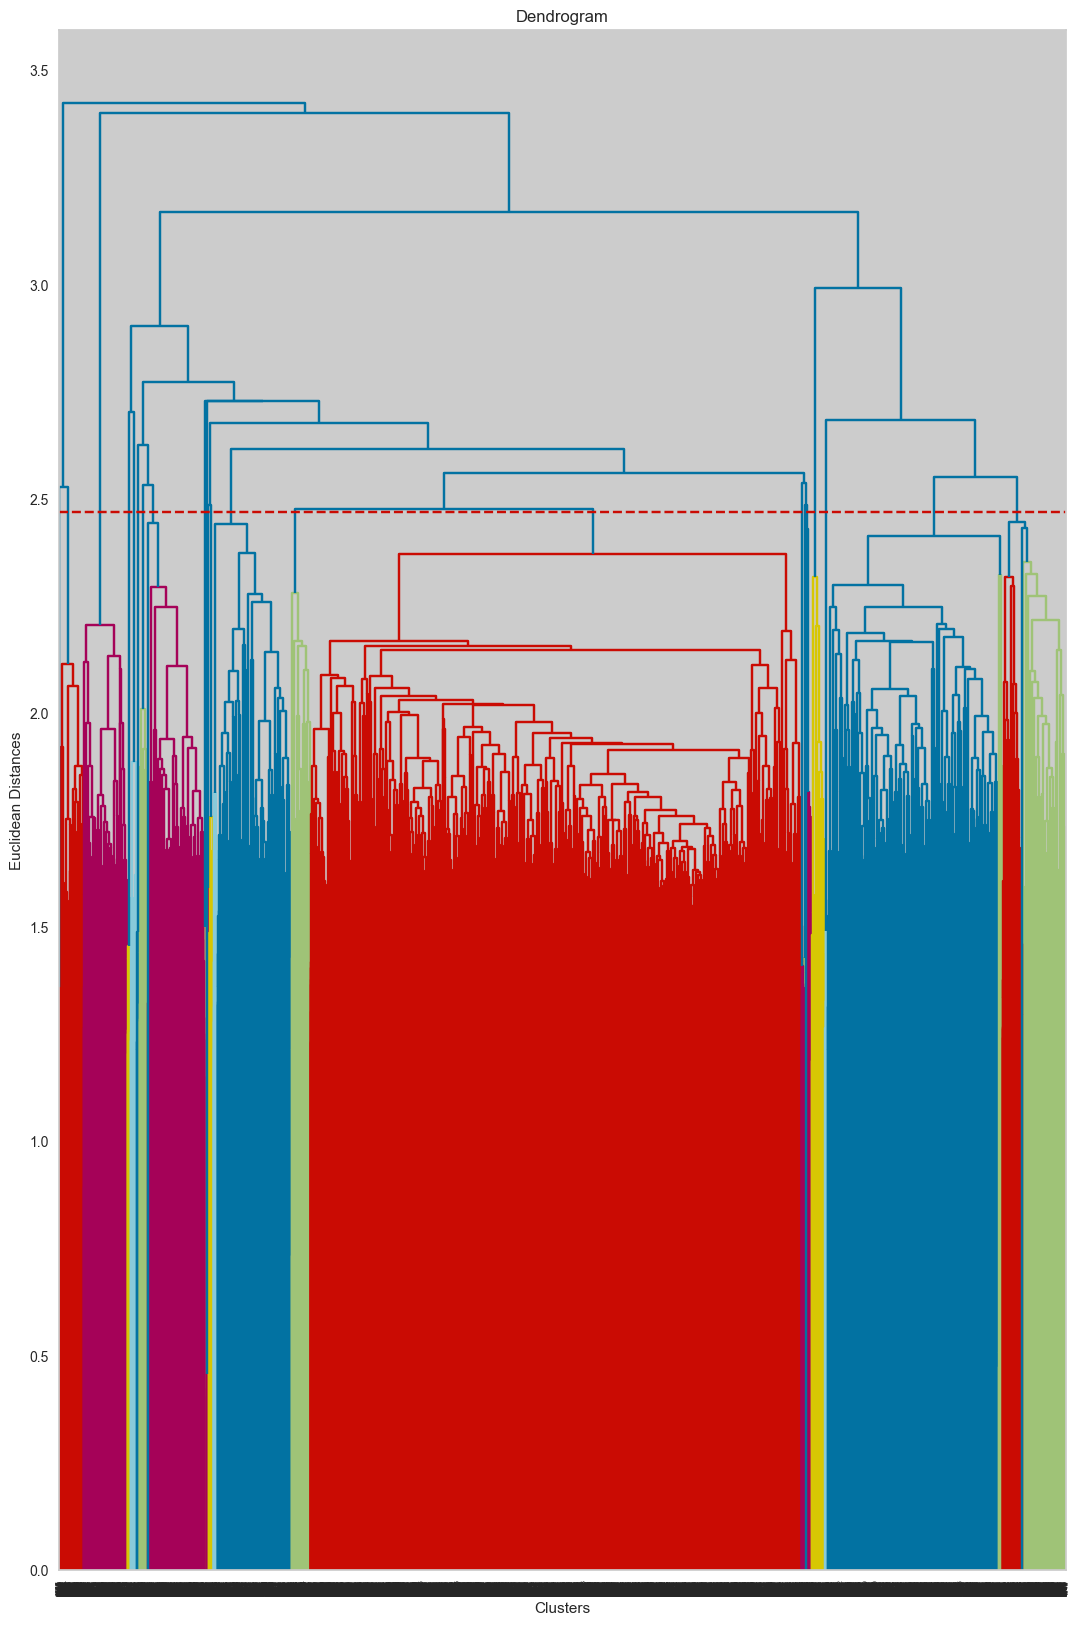

In [119]:
# [2] Hierarchical Clustering
# Dendogram Method
# Finding the optimal number of clusters using the dendogram

## Using the dendogram to find the optimal number of clusters

# Import necessary libraries
import scipy.cluster.hierarchy as sch

# Plotting dendogram
plt.figure(figsize=(13,20))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=2.47, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distances')
plt.show()

In [121]:
## Training the hierarchical clustering model on a dataset for number of clusters K=19

# Import dependancy
from sklearn.cluster import AgglomerativeClustering
# Fitting model
hc = AgglomerativeClustering(n_clusters = 19, metric = 'euclidean', linkage = 'ward', compute_distances=True)
hc.fit(X)

AgglomerativeClustering(compute_distances=True, n_clusters=19)

In [122]:
# Predict result
y_predict= hc.labels_
y_predict

array([3, 6, 3, ..., 6, 6, 1], shape=(7770,))

In [123]:
### Evaluation of hierarchical clustering model
## Function to evaluate and visualize evaluation metrics of the hierarchical clustering model

# Import necessary dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def hierarchical_clustering_eval(model, X , y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)
    
    # Data 
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')
    
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)
    
    return {'Num_clusters':len(set(y_predict)),'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Evaluation result :

Number of clusters: 19
Silhouette score: -0.003571682464638294
Calinski-Harabasz score: 3.9668002023655857
Davies-Bouldin score: 12.053942413604057
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+----+-------------------------+-------------+
|    | Evaluation Metrics      |      Result |
+====+=========================+=============+
|  0 | Silhouette score        | -0.00357168 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz score |  3.9668     |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin score    | 12.0539     |
+----+-------------------------+-------------+

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



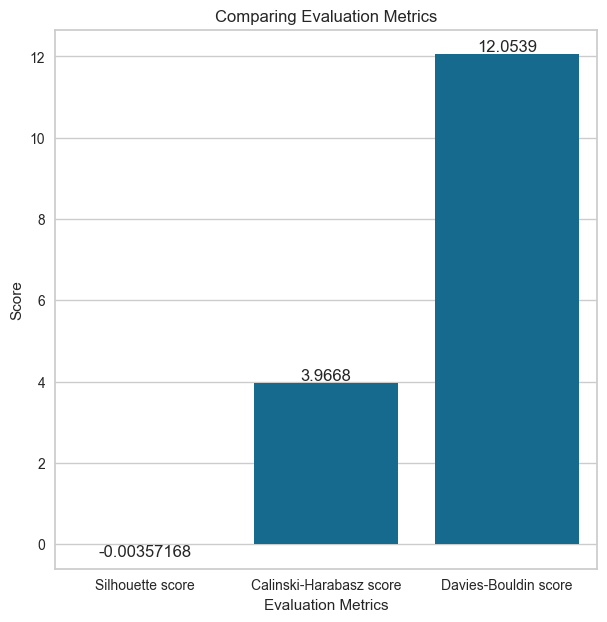

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [124]:
# Evaluation of Model
hc_eval=hierarchical_clustering_eval(hc, X, y_predict)

In [125]:
## Assigne Movies and TV Shows to its cluster

# Copy dataset
hc_df=df.copy()

# Droping non original features from dataset
hc_df.drop(columns={'description_len','contractions_description', 'punctuation_%', 'no_sw_pun_description',
                        'clean_description', 'tokenized_description', 'lemmatized_description',
                        'final_description', 'final_description_len'}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
hc_df['cluster'] = hc.labels_
hc_df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added  cluster  
0         14        3  
1         23        6  
2         20        3  
3         16        6  
4          1        6

Text(0, 0.5, 'Number of Movies / TV Shows')

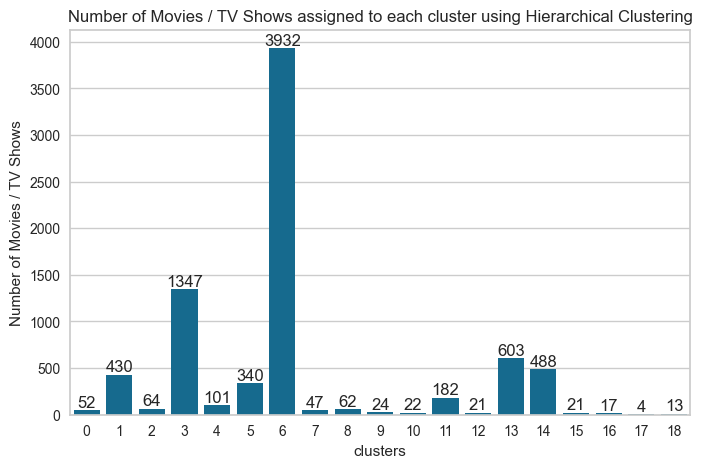

In [127]:
## Finding number of Movies / TV Shows assigned to each cluster

# Create dataframe for  number of movies/Tv shows in each cluster
num_datapoint_in_clusters=hc_df['cluster'].value_counts().reset_index()

# Plotting bar plot
plt.figure(figsize=(8,5))
# ax=sns.barplot(x=num_datapoint_in_clusters['index'],y=num_datapoint_in_clusters['cluster'])
ax = sns.barplot(x='cluster', y='count', data=num_datapoint_in_clusters)
ax.bar_label(ax.containers[0])
ax.set_title("Number of Movies / TV Shows assigned to each cluster using Hierarchical Clustering")
ax.set_xlabel("clusters")
ax.set_ylabel("Number of Movies / TV Shows")

In [128]:
# [3] DBSCAN Clustering
# Density-Based Spatial Clustering of Applications with Noise

## Training the DBSCAN model on a dataset

# Import dependancy
from sklearn.cluster import DBSCAN
# Fitting model
dbscan = DBSCAN(eps=0.0375, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.0375, min_samples=3)

In [129]:
# Predict result
y_predict = dbscan.labels_
y_predict

array([-1, -1, -1, ..., -1, -1, -1], shape=(7770,))

In [130]:
### Evaluation of DBSCAN model
## Function to evaluate and visualize evaluation metrics of the DBSCAN model

# Import necessary dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def dbscan_clustering_eval(model, X , y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)
    
    # Data 
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')
    
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)
    
    return {'Num_clusters':len(set(y_predict)),'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Evaluation result :

Number of clusters: 4
Silhouette score: -0.003758973196122149
Calinski-Harabasz score: 3.0031863007166932
Davies-Bouldin score: 1.0000736760095492
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+----+-------------------------+-------------+
|    | Evaluation Metrics      |      Result |
+====+=========================+=============+
|  0 | Silhouette score        | -0.00375897 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz score |  3.00319    |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin score    |  1.00007    |
+----+-------------------------+-------------+

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



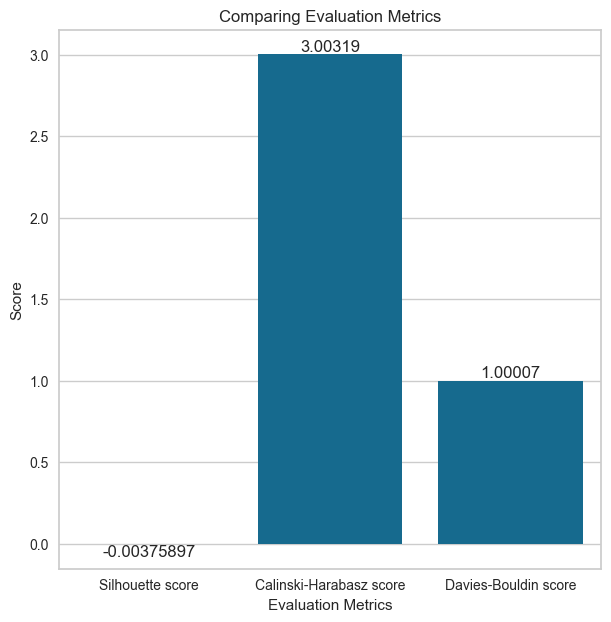

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [131]:
# Evaluation of Model
dbscan_eval=dbscan_clustering_eval(dbscan, X, y_predict)

In [132]:
## Assigne Movies and TV Shows to its cluster

# Copy dataset
dbscan_df=df.copy()

# Droping non original features from dataset
dbscan_df.drop(columns={'description_len','contractions_description', 'punctuation_%', 'no_sw_pun_description',
                        'clean_description', 'tokenized_description', 'lemmatized_description',
                        'final_description', 'final_description_len'}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
dbscan_df['cluster'] = dbscan.labels_
dbscan_df.head()

show_id     type  title              director  \
0      s1  TV Show     3%  Director Unavailable   
1      s2    Movie   7:19     Jorge Michel Grau   
2      s3    Movie  23:59          Gilbert Chan   
3      s4    Movie      9           Shane Acker   
4      s5    Movie     21        Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              geners  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added  cluster  
0         14       -1  
1         23       -1  
2         20       -1  
3         16       -1  
4          1       -1

Text(0, 0.5, 'Number of Movies / TV Shows')

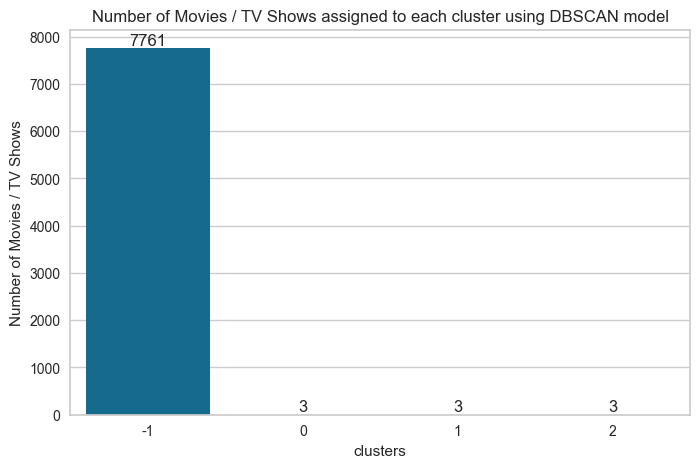

In [134]:
## Finding number of Movies / TV Shows assigned to each cluster

# Create dataframe for  number of movies/Tv shows in each cluster
num_datapoint_in_clusters=dbscan_df['cluster'].value_counts().reset_index()

# Plotting bar plot
plt.figure(figsize=(8,5))
# ax=sns.barplot(x=num_datapoint_in_clusters['index'],y=num_datapoint_in_clusters['cluster'])
ax = sns.barplot(x='cluster', y='count', data=num_datapoint_in_clusters)
ax.bar_label(ax.containers[0])
ax.set_title("Number of Movies / TV Shows assigned to each cluster using DBSCAN model")
ax.set_xlabel("clusters")
ax.set_ylabel("Number of Movies / TV Shows")

In [135]:
## Creating dataframe of performance metrics of all builded models

# Data
model=['K-Means Clustering','Hierarchical Clustering','DBSCAN Clustering']
silhouette_score=[Kmeans_eval['silhouette'],hc_eval['silhouette'],dbscan_eval['silhouette']]
calinski_harabasz_score=[Kmeans_eval['ch_score'],hc_eval['ch_score'],dbscan_eval['ch_score']]
davies_bouldin_score=[Kmeans_eval['db_score'],hc_eval['db_score'],dbscan_eval['db_score']]

# Create a dataframe
models_evaluation_df = pd.DataFrame({'model': model, 'silhouette_score': silhouette_score,
                                     'calinski_harabasz_score': calinski_harabasz_score,
                                     'davies_bouldin_score':davies_bouldin_score})
# Dataframe
models_evaluation_df

model  silhouette_score  calinski_harabasz_score  \
0       K-Means Clustering          0.004121                 8.138140   
1  Hierarchical Clustering         -0.003572                 3.966800   
2        DBSCAN Clustering         -0.003759                 3.003186   

   davies_bouldin_score  
0             11.906442  
1             12.053942  
2              1.000074

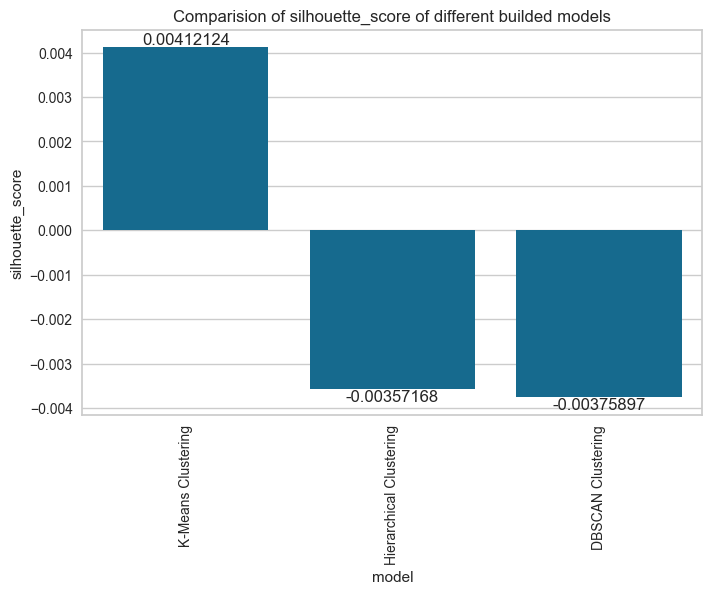

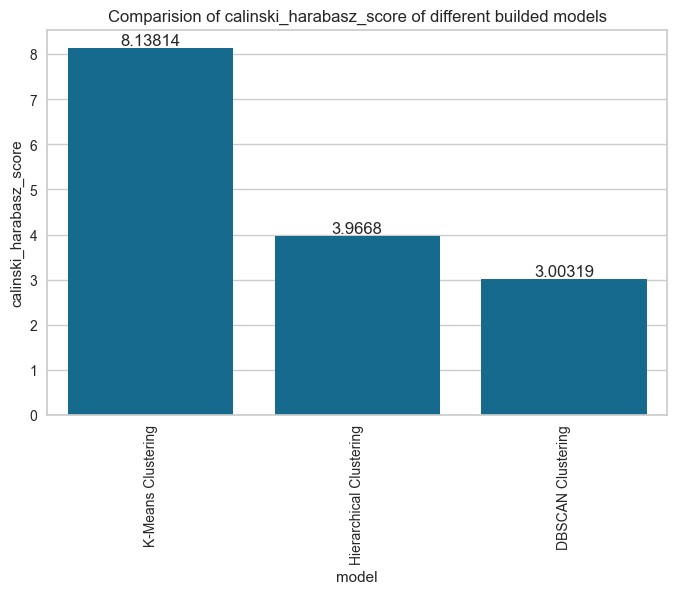

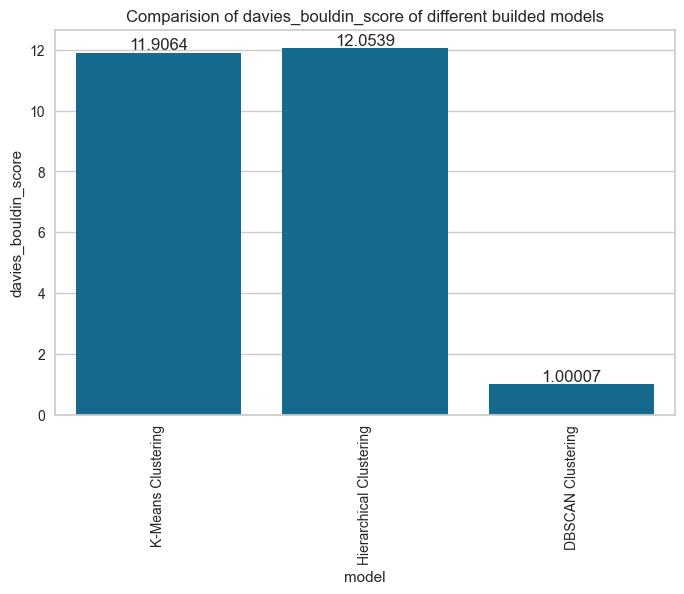

In [136]:
## Plotting bar plot to compare each evaluation metric for different models

# Defining target
col=[var for var in models_evaluation_df.columns if var not in ['model']]

for var in col:
    plt.figure(figsize=(8,5))
    ax=sns.barplot(x=models_evaluation_df['model'], y=models_evaluation_df[var])
    ax.set_title(f'Comparision of {var} of different builded models')
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=90)
    plt.show()

In [179]:
# BUSINESS CASE 1

# Function to recommend similar content based on description cluster
def recommend_similar_content(title, df_clustered, top_n=5):
    """
    Recommends similar content based on the cluster label.

    Parameters:
    title (str): Title of the show/movie user watched.
    df_clustered (DataFrame): The dataframe with title and cluster info.
    top_n (int): Number of recommendations.

    Returns:
    DataFrame: Top-N similar content recommendations.
    """
    # Check if title exists
    if title not in df_clustered['title'].values:
        print("Title not found in dataset!")
        return None

    # Get cluster of the selected title
    target_cluster = df_clustered[df_clustered['title'] == title]['cluster'].values[0]

    # Get all contents from the same cluster excluding the selected title
    recommended_df = df_clustered[(df_clustered['cluster'] == target_cluster) &
                                  (df_clustered['title'] != title)]

    # Shuffle to add randomness and select top N
    recommended_df = recommended_df.sample(frac=1).head(top_n)

    return recommended_df[['title', 'type', 'geners', 'country', 'release_year']]


# 📦 Example Usage
title_to_search = "Breakout"  # Replace with any valid title from your dataset
# recommendations = recommend_similar_content(kmeans_df, title_to_search, top_n=5)
recommendations = recommend_similar_content(title_to_search, kmeans_df, top_n=5)


# Display recommended content
print(f"\nTop 5 Recommendations for: {title_to_search}")
print(recommendations)



Top 5 Recommendations for: Breakout
                       title     type  \
3791  Lovestruck in the City  TV Show   
4753              Panic Room    Movie   
6367              The Forest    Movie   
3875         Maine Pyar Kiya    Movie   
5697      Solo Con Tu Pareja    Movie   

                                                 geners        country  \
3791  International TV Shows, Romantic TV Shows, TV ...    South Korea   
4753                                          Thrillers  United States   
6367                  Horror Movies, Independent Movies  United States   
3875     Dramas, International Movies, Music & Musicals          India   
5697  Comedies, Independent Movies, International Mo...         Mexico   

      release_year  
3791          2020  
4753          2005  
6367          2016  
3875          2005  
5697          2005  


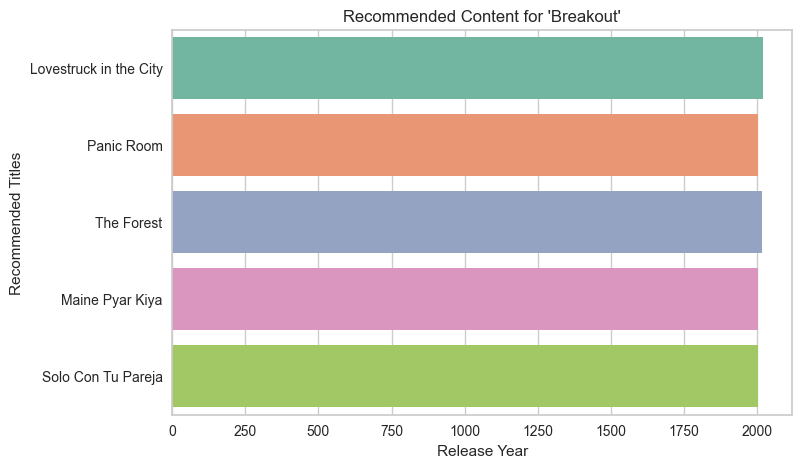

In [180]:
# Visualize recommended content
if recommendations is not None:
    plt.figure(figsize=(8,5))
    sns.barplot(y=recommendations['title'], x=recommendations['release_year'], palette='Set2')
    plt.title(f"Recommended Content for '{title_to_search}'")
    plt.xlabel('Release Year')
    plt.ylabel('Recommended Titles')
    plt.show()


In [189]:
# Step 1: Count shows/movies in each cluster
cluster_counts = kmeans_df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']

# Step 2: Define niche threshold (e.g., clusters with fewer than 1.5% of total content)
threshold = int(0.05 * len(kmeans_df))
niche_clusters = cluster_counts[cluster_counts['count'] < threshold]['cluster'].tolist()

print(f"📌 Identified Niche Clusters: {niche_clusters}")

# Step 3: Extract content from these niche clusters
niche_content_df = kmeans_df[kmeans_df['cluster'].isin(niche_clusters)]

# Step 4: Display a sample of niche content
print("\n🎬 Sample Niche Category Content:")
display(niche_content_df[['title', 'type', 'country', 'release_year', 'geners', 'cluster']].sample(10))


📌 Identified Niche Clusters: [13, 10, 11, 6, 8, 3, 9, 0, 14, 2, 15, 12, 4, 5]

🎬 Sample Niche Category Content:


title     type  \
6820              The Rift: The Dark Side of the Moon    Movie   
416                                        All of You    Movie   
227              A Shaun the Sheep Movie: Farmageddon    Movie   
1105                               Bring It On, Ghost  TV Show   
4797                 Patton Oswalt: I Love Everything  TV Show   
5333                               Sad Hill Unearthed    Movie   
3750                               Love Cheque Charge  TV Show   
4506  Norm Macdonald: Hitler's Dog, Gossip & Trickery    Movie   
2208                                    Flock of Four    Movie   
1942                                El último testigo    Movie   

                                                country  release_year  \
6820                      Serbia, South Korea, Slovenia          2016   
416                                         Philippines          2017   
227   United Kingdom, France, Belgium, United States...          2020   
1105                                        South Korea          2016   
4797                                      United States          2020   
5333                                              Spain          2017   
3750                                             Taiwan          2014   
4506                                      United States          2017   
2208                                      United States          2018   
1942     United States, Canada, Belgium, United Kingdom          2012   

                                                 geners  cluster  
6820  Horror Movies, Independent Movies, Sci-Fi & Fa...        2  
416              Comedies, Dramas, International Movies       11  
227                  Children & Family Movies, Comedies       10  
1105  International TV Shows, Korean TV Shows, Roman...       10  
4797          Stand-Up Comedy & Talk Shows, TV Comedies        2  
5333                Documentaries, International Movies        8  
3750  International TV Shows, Romantic TV Shows, TV ...       13  
4506                                    Stand-Up Comedy        2  
2208       Dramas, Independent Movies, Music & Musicals       13  
1942                                 Action & Adventure        3

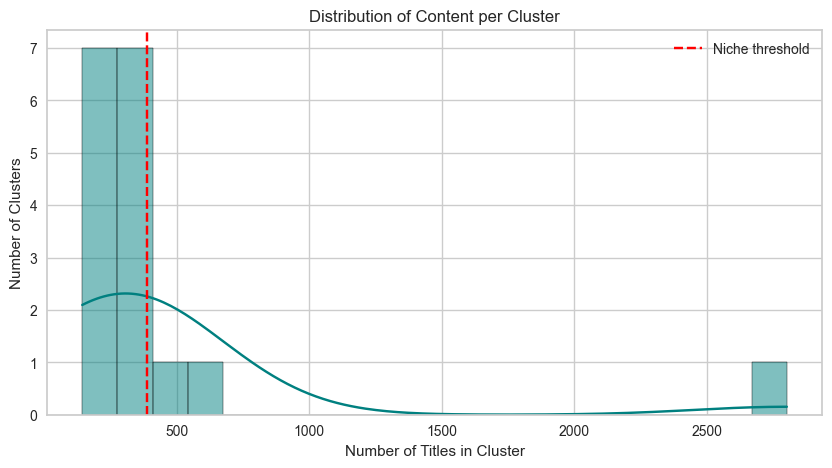

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(cluster_counts['count'], bins=20, kde=True, color='teal')
plt.axvline(threshold, color='red', linestyle='--', label='Niche threshold')
plt.title("Distribution of Content per Cluster")
plt.xlabel("Number of Titles in Cluster")
plt.ylabel("Number of Clusters")
plt.legend()
plt.show()


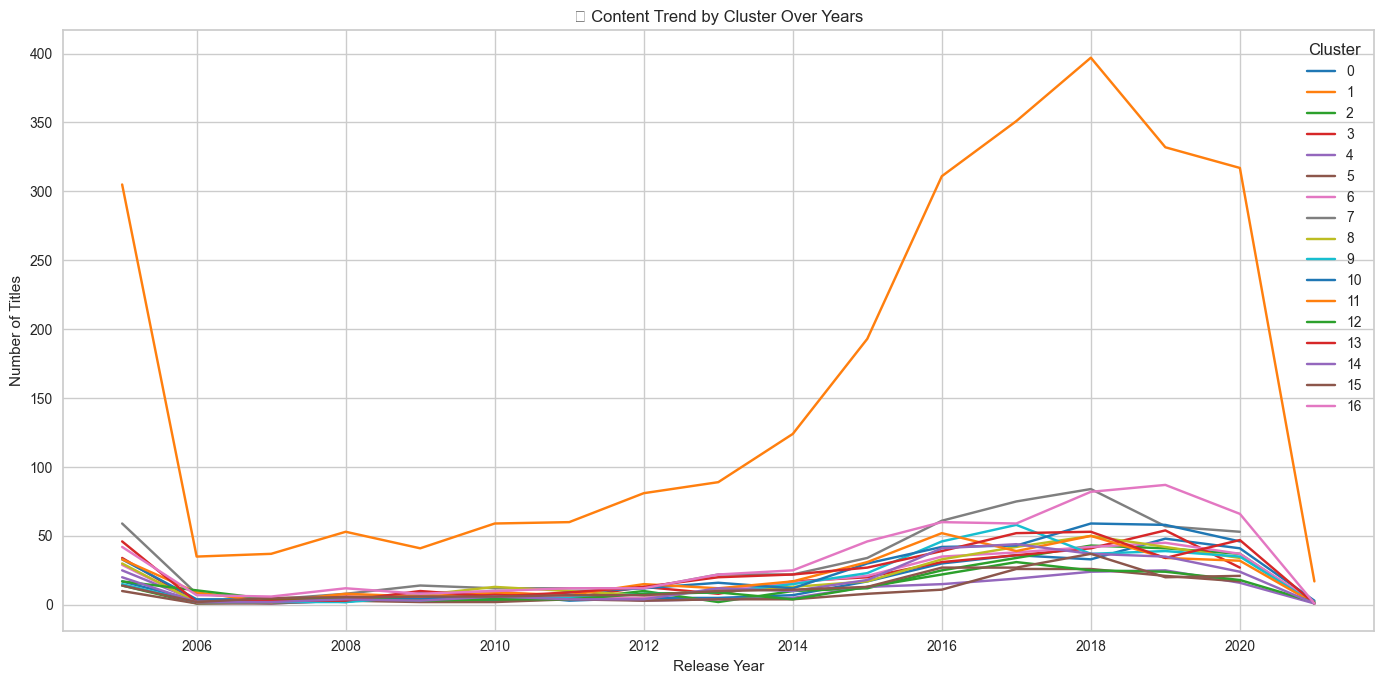

In [191]:
# 📌 Group data by cluster, year, and country to analyze market trends

# Step 1: Group by cluster and release year
cluster_year_df = kmeans_df.groupby(['cluster', 'release_year']).size().reset_index(name='count')

# Step 2: Plot content production trends per cluster over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=cluster_year_df, x='release_year', y='count', hue='cluster', palette='tab10')
plt.title('📈 Content Trend by Cluster Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


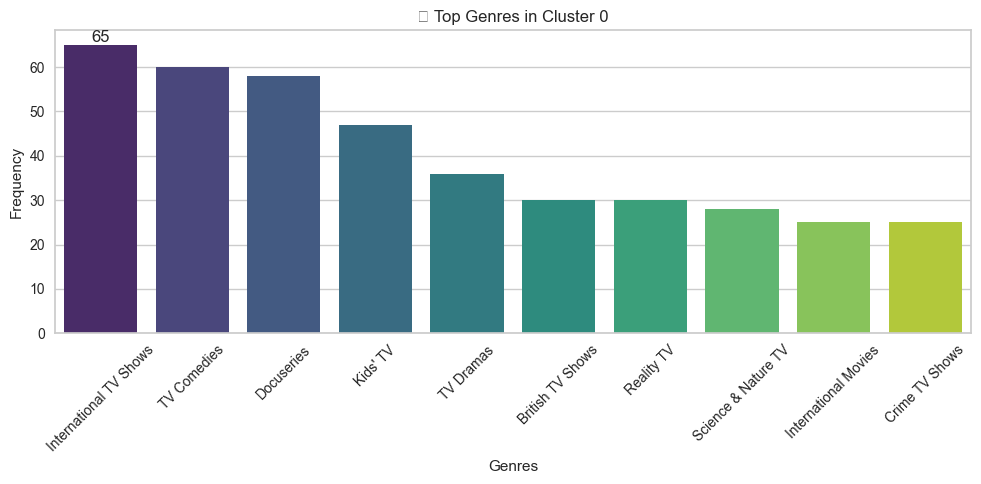

In [192]:
# Step 3: Split genres and explode
kmeans_df['geners'] = kmeans_df['geners'].astype(str)
exploded_genres = kmeans_df.assign(genres_split=kmeans_df['geners'].str.split(',')) \
                            .explode('genres_split')
exploded_genres['genres_split'] = exploded_genres['genres_split'].str.strip()

# Step 4: Group by cluster and genre
cluster_genre = exploded_genres.groupby(['cluster', 'genres_split']).size().reset_index(name='count')

# Step 5: Plot top genres for each cluster (use cluster 0 as example)
target_cluster = 0
top_genres = cluster_genre[cluster_genre['cluster'] == target_cluster].sort_values('count', ascending=False).head(10)

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top_genres, x='genres_split', y='count', palette='viridis')
ax.set_title(f'🎯 Top Genres in Cluster {target_cluster}')
ax.set_xlabel('Genres')
ax.set_ylabel('Frequency')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


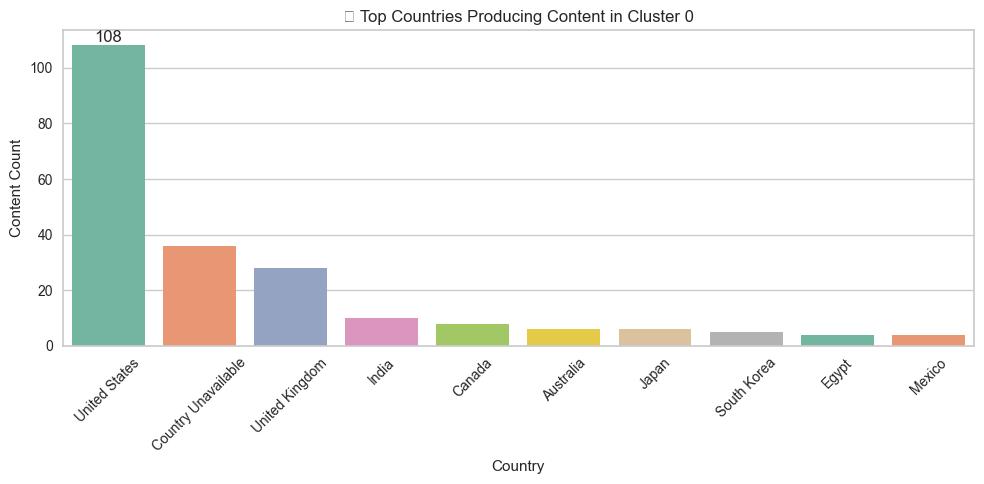

In [193]:
# Step 6: Country trend across clusters
country_cluster_df = kmeans_df.groupby(['cluster', 'country']).size().reset_index(name='count')

# Top countries per cluster (again, using cluster 0 as an example)
top_country = country_cluster_df[country_cluster_df['cluster'] == target_cluster] \
                .sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top_country, x='country', y='count', palette='Set2')
ax.set_title(f'🌍 Top Countries Producing Content in Cluster {target_cluster}')
ax.set_xlabel('Country')
ax.set_ylabel('Content Count')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


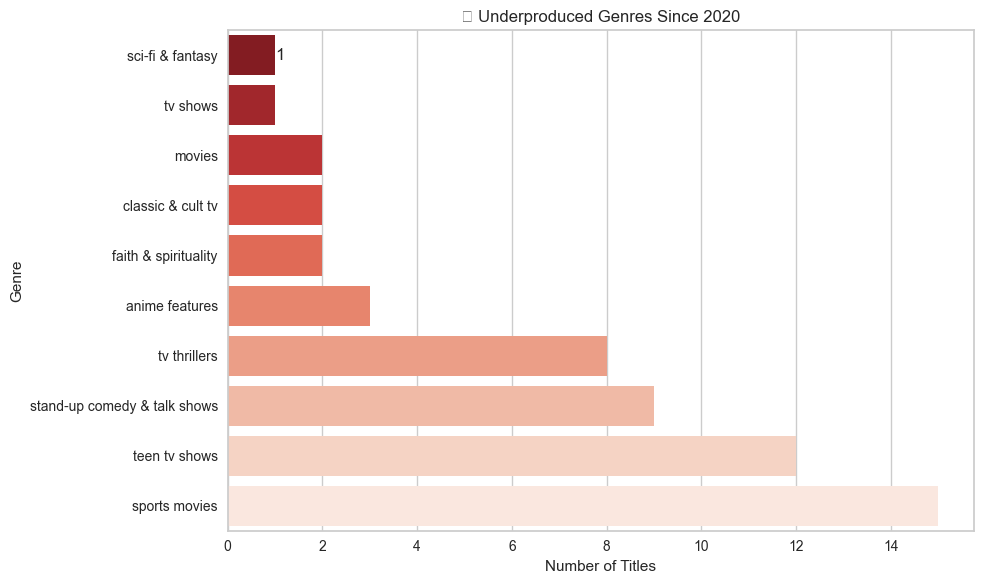

In [194]:
# Step 1: Explode genres
kmeans_df['geners'] = kmeans_df['geners'].astype(str)
exploded = kmeans_df.assign(genre_split=kmeans_df['geners'].str.split(',')).explode('genre_split')
exploded['genre_split'] = exploded['genre_split'].str.strip().str.lower()

# Step 2: Count frequency of content per (genre, year)
genre_year_trend = exploded.groupby(['genre_split', 'release_year']).size().reset_index(name='count')

# Step 3: Identify genres with low production in recent years (e.g., 2020+)
recent_years = genre_year_trend[genre_year_trend['release_year'] >= 2020]
low_production_genres = recent_years.groupby('genre_split')['count'].sum().reset_index()
low_production_genres = low_production_genres.sort_values(by='count', ascending=True).head(10)

# Step 4: Plot underproduced genres
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='count', y='genre_split', data=low_production_genres, palette='Reds_r')
ax.set_title("📉 Underproduced Genres Since 2020")
ax.set_xlabel("Number of Titles")
ax.set_ylabel("Genre")
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()


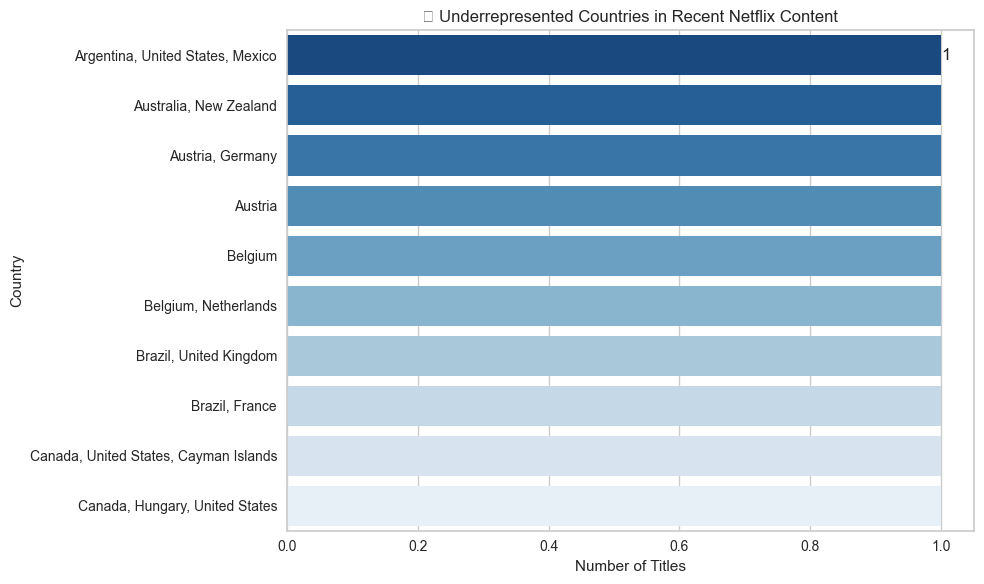

In [195]:
# Step 5: Identify country gaps
country_year_df = kmeans_df.groupby(['country', 'release_year']).size().reset_index(name='count')
recent_country = country_year_df[country_year_df['release_year'] >= 2020]

# Get countries with the lowest recent production
low_production_country = recent_country.groupby('country')['count'].sum().reset_index()
low_production_country = low_production_country.sort_values(by='count', ascending=True).head(10)

# Step 6: Plot underrepresented countries
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='count', y='country', data=low_production_country, palette='Blues_r')
ax.set_title("🌍 Underrepresented Countries in Recent Netflix Content")
ax.set_xlabel("Number of Titles")
ax.set_ylabel("Country")
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()


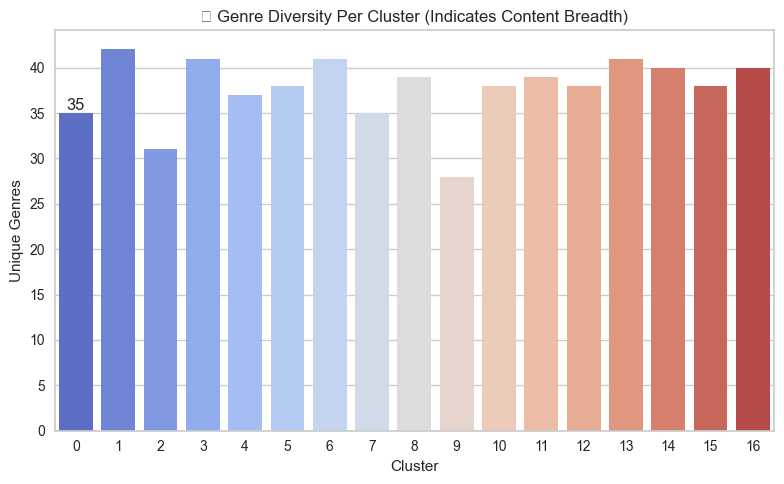

In [196]:
# Step 7: Determine how many unique genres exist per cluster
genres_per_cluster = exploded.groupby('cluster')['genre_split'].nunique().reset_index(name='unique_genre_count')

# Step 8: Plot genre diversity in each cluster
plt.figure(figsize=(8,5))
ax = sns.barplot(x='cluster', y='unique_genre_count', data=genres_per_cluster, palette='coolwarm')
ax.set_title('🎭 Genre Diversity Per Cluster (Indicates Content Breadth)')
ax.set_xlabel('Cluster')
ax.set_ylabel('Unique Genres')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()


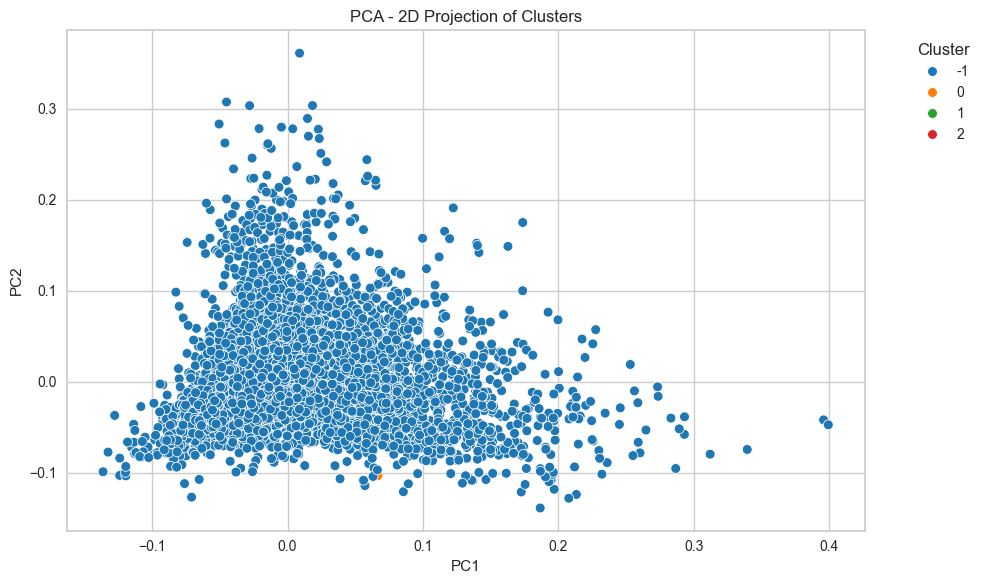

In [197]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = y_predict

# Plot the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='tab10', s=50)
plt.title('PCA - 2D Projection of Clusters')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


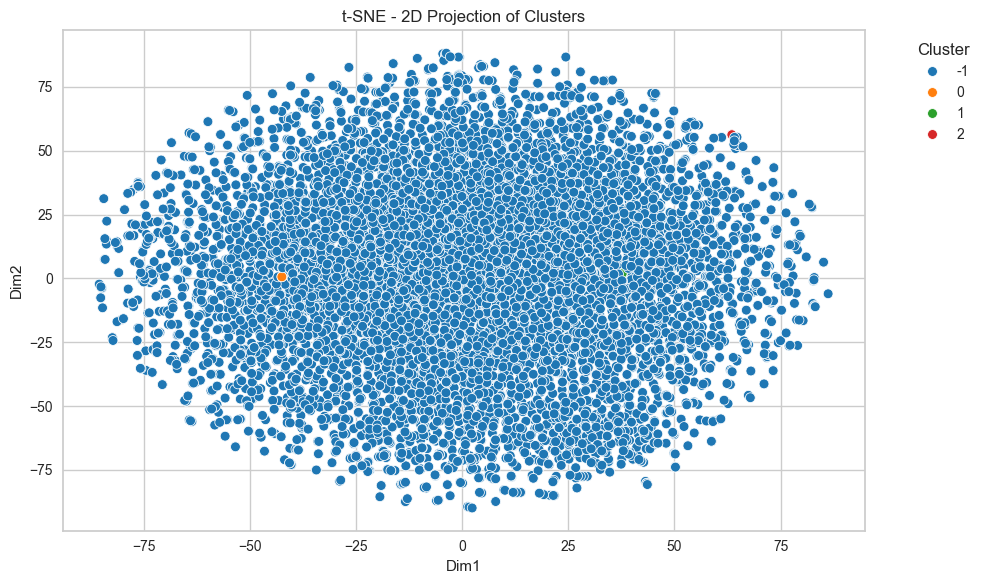

In [199]:
from sklearn.manifold import TSNE

# Apply t-SNE (this may take time on large datasets)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create DataFrame
tsne_df = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
tsne_df['cluster'] = y_predict

# Plot t-SNE result
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='cluster', palette='tab10', s=50)
plt.title('t-SNE - 2D Projection of Clusters')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


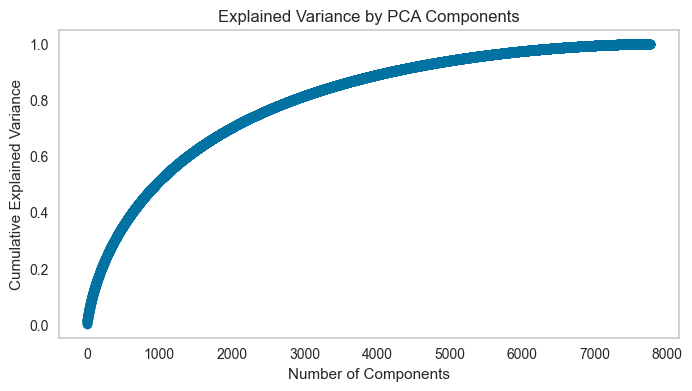

In [200]:
# Scree plot to understand how many components explain variance
pca_full = PCA().fit(X)
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()
